# **Version 2**

In [ ]:
pip install pydmd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go
import pydmd
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from pydmd import DMD
from pydmd.plotter import plot_eigs

**Importing packages**

In [3]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE500i.csv",header=None)
# transposing the DataFrame and filling any NaN values with 0.
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)
matx

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
0,7002.500000,7028.750000,7030.750000,7106.899902,7083.100098,7085.149902,7132.200195,7214.149902,7231.850098,7228.299805,...,15530.849610,15615.150390,15567.250000,15440.000000,15649.099610,15650.200200,15693.900390,15663.299800,15597.250000,15550.849610
1,1036.900024,1045.349976,1038.650024,1035.750000,1044.349976,1036.800049,1175.500000,1132.500000,1125.300049,1132.500000,...,3219.899902,3262.350098,3103.899902,3166.899902,3155.850098,3025.199951,3027.850098,3035.649902,3122.199951,3092.649902
2,1351.900024,1343.550049,1319.400024,1332.849976,1333.900024,1327.849976,1319.599976,1348.699951,1341.599976,1329.500000,...,2480.699951,2484.949951,2438.350098,2392.250000,2390.649902,2435.449951,2478.649902,2465.600098,2448.149902,2460.699951
3,1319.250000,1292.400024,1299.949951,1293.849976,1271.650024,1283.550049,1291.800049,1316.050049,1396.750000,1353.099976,...,2739.850098,2716.449951,2638.449951,2629.449951,2593.550049,2731.750000,2674.300049,2604.199951,2575.050049,2659.050049
4,91.970001,92.514999,93.949997,94.190002,95.309998,94.239998,95.099998,96.059998,99.565002,100.955002,...,1099.800049,1098.300049,1061.099976,1046.849976,1050.349976,1084.000000,1073.599976,1088.650024,1092.849976,1081.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,666.400024,666.349976,665.599976,673.450012,710.900024,698.500000,699.400024,696.849976,686.150024,695.599976,...,239.199997,238.949997,238.100006,228.750000,225.399994,236.750000,236.949997,237.350006,235.550003,234.250000
457,228.929993,232.580002,232.630005,242.039993,249.350006,251.240005,252.919998,263.570007,265.100006,263.609985,...,16.450001,16.549999,16.549999,16.500000,16.850000,17.100000,17.049999,17.049999,16.950001,16.850000
458,451.600006,458.299988,458.600006,470.700012,463.100006,465.100006,467.750000,478.299988,476.450012,477.549988,...,265.100006,264.399994,262.450012,261.700012,265.850006,259.600006,260.149994,254.750000,252.949997,250.850006
459,39.900002,40.849998,42.950001,43.900002,43.549999,42.799999,45.250000,45.599998,46.549999,46.250000,...,7.100000,7.100000,7.100000,7.200000,7.150000,7.100000,7.100000,7.100000,7.100000,7.050000


In [4]:
j=10
df = []
i=21
# Get the last 20 columns of the DataFrame
mat = matx.iloc[:, -(i+j):-j]
day2 = matx.iloc[:, -(i+j)+1]
# Create a DMD object and fit it to the data
mat = mat.astype(float)
cp = mat.iloc[:, -1]
cp1 = mat.iloc[:, -1]
cp2 = mat.iloc[:, -2]
mat=mat.to_numpy()
# number of columns are used as rank
dmd = pydmd.DMD(svd_rank=mat.shape[1])

dmd.fit(mat)

pred = dmd.predict(mat)
p=pred[:,-1]
mean_absolute_error(cp,np.real(p))

15.529944089342248

In [5]:
import numpy as np

# Assuming cp and np.real(p) are your actual and predicted values
actual_values = np.array(cp)
predicted_values = np.real(p)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 1.94%


In [ ]:
#  dmd.modes gives the number of spatial points and the rank of the DMD decomposition.
dmd.modes.shape

(461, 20)

In [6]:
dmd.reconstructed_data.shape

(461, 21)

In [7]:
# number of eigenvalues in the DMD decomposition.
dmd.eigs.shape

(20,)

In [35]:
eigenvalues = dmd.eigs
eigenvalues

array([ 1.00390778+0.01711516j,  1.00390778-0.01711516j,
        0.90899115+0.33231226j,  0.90899115-0.33231226j,
        0.6322923 +0.58996016j,  0.6322923 -0.58996016j,
        0.46589924+0.7336859j ,  0.46589924-0.7336859j ,
        0.22428004+0.95174489j,  0.22428004-0.95174489j,
       -0.17519156+0.95166748j, -0.17519156-0.95166748j,
       -0.44260953+0.77098977j, -0.44260953-0.77098977j,
       -0.66787805+0.60344562j, -0.66787805-0.60344562j,
       -0.84243476+0.33900317j, -0.84243476-0.33900317j,
       -0.82353834+0.j        , -0.43957672+0.j        ])

In [10]:
#Create a diagonal matrix with the eigenvalues on the main diagonal
np.diag(np.power(dmd.eigs,1)).shape
#The shape of the resulting diagonal matrix will be (r, r), where r is the rank of the DMD decomposition

(20, 20)

In [12]:
# number of columns
common_dim = dmd.modes.shape[1]
#The slicing [:common_dim, :common_dim] ensures
#that only the top-left square part of the matrix is considered, with dimensions matching the rank of the DMD.
diag_matrix = np.diag(np.power(dmd.eigs, 1))[:common_dim, :common_dim]
future_state = dmd.reconstructed_data[:, :common_dim] @ diag_matrix @ dmd.modes.T
# predicted future state obtained by applying the DMD model to the current state represented by p
p2 = future_state @ p.T


In [16]:
#day2 is your actual values and p2 is your predicted values
mean_absolute_error(day2,np.real(p2))

328655565.6126058

In [17]:
# # Predict the next
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] - 1
p = np.real(dmd.predict(dmd.reconstructed_data))
p=p[:,-1]
mean_absolute_error(day2,np.real(p))

80.71801400499339

In [ ]:
np.linalg.matrix_rank(mat)

21

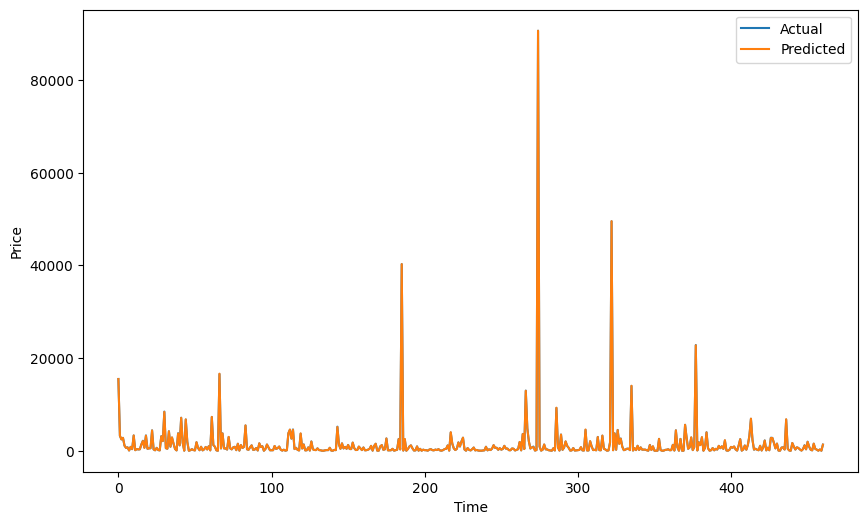

In [18]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cp, label='Actual')
ax.plot(np.real(p), label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


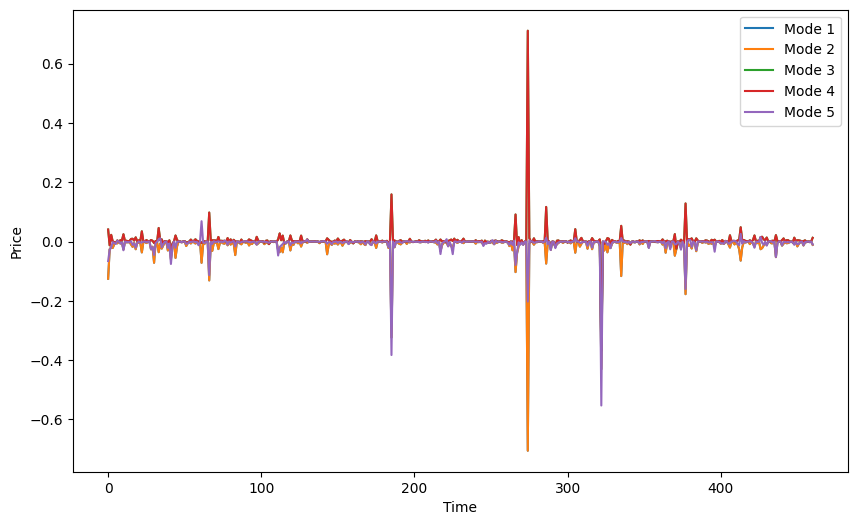

In [39]:
#plotting the 5 dmd modes
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dmd.modes[:, 0], label='Mode 1')
ax.plot(dmd.modes[:, 1], label='Mode 2')
ax.plot(dmd.modes[:, 2], label='Mode 3')
ax.plot(dmd.modes[:, 3], label='Mode 4')
ax.plot(dmd.modes[:, 4], label='Mode 5')

ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.show()

Eigenvalue (1.0039077773234892+0.017115162362894367j): distance from unit circle 0.00405366099292559
Eigenvalue (1.0039077773234892-0.017115162362894367j): distance from unit circle 0.00405366099292559
Eigenvalue (0.9089911461463983+0.33231225729562464j): distance from unit circle 0.03216926060314851
Eigenvalue (0.9089911461463983-0.33231225729562464j): distance from unit circle 0.03216926060314851
Eigenvalue (0.6322923038541197+0.5899601606166971j): distance from unit circle 0.13521878568736856
Eigenvalue (0.6322923038541197-0.5899601606166971j): distance from unit circle 0.13521878568736856
Eigenvalue (0.46589924390062154+0.7336859021028419j): distance from unit circle 0.1308871716447676
Eigenvalue (0.46589924390062154-0.7336859021028419j): distance from unit circle 0.1308871716447676
Eigenvalue (0.22428004181240388+0.9517448925956734j): distance from unit circle 0.022186174296290884
Eigenvalue (0.22428004181240388-0.9517448925956734j): distance from unit circle 0.022186174296290884


/usr/local/lib/python3.10/dist-packages/pydmd/plotter.py:191: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(


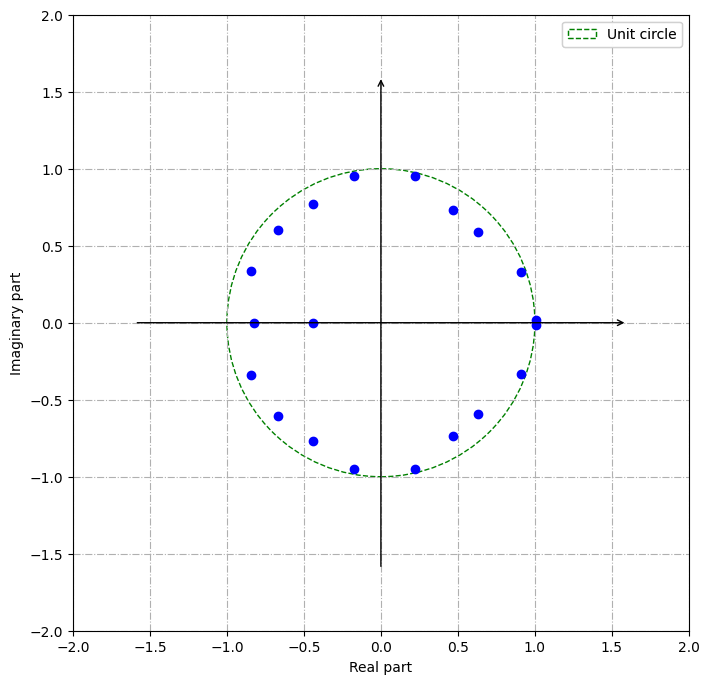

In [41]:
for eig in dmd.eigs:
    print(
        "Eigenvalue {}: distance from unit circle {}".format(
            eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)
        )
    )

plot_eigs(dmd, show_axes=True, show_unit_circle=True)

In [42]:
dmd.growth_rate

array([ 1.00390778,  1.00390778,  0.90899115,  0.90899115,  0.6322923 ,
        0.6322923 ,  0.46589924,  0.46589924,  0.22428004,  0.22428004,
       -0.17519156, -0.17519156, -0.44260953, -0.44260953, -0.66787805,
       -0.66787805, -0.84243476, -0.84243476, -0.82353834, -0.43957672])

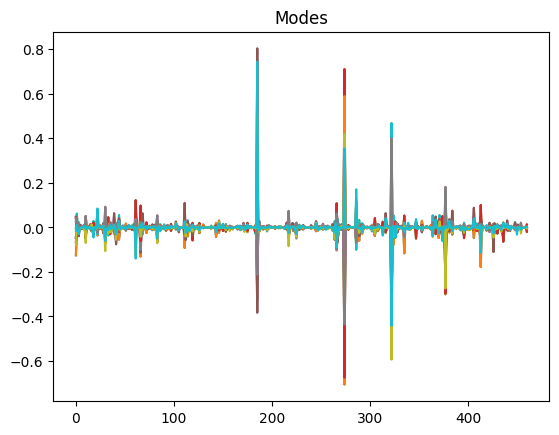

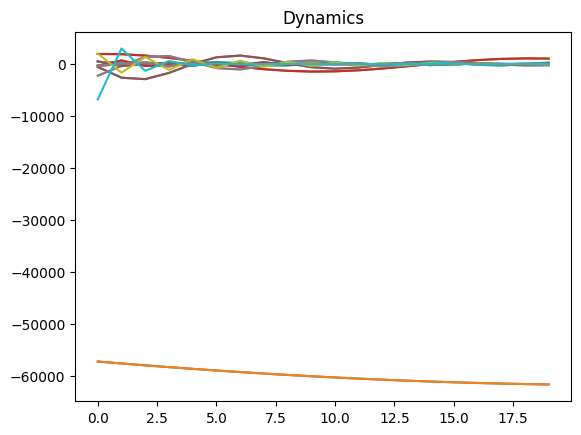

In [ ]:
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()


In [43]:
A_tilde = dmd.reconstructed_data
Phi = dmd.modes
A = dmd.eigs
Phi.shape

(461, 20)

In [44]:
# predicting the next day
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 1
dmd.reconstructed_data.shape

(461, 21)

In [45]:
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,14965.799800,15053.049800,15036.700200,14951.650390,14721.900390,14829.950200,14730.299800,14815.099610,14906.150390,15056.549800,...,15112.099610,15081.099610,15198.750000,15158.099610,15244.250000,15241.599610,15424.000000,15537.400390,15497.549800,15484.700200
1,3080.800049,3188.850098,3296.100098,3230.550049,3197.050049,3247.500000,3265.850098,3194.300049,3196.550049,3211.600098,...,3132.800049,3041.250000,3052.800049,3055.250000,3039.399902,2962.100098,3049.750000,3152.149902,3170.850098,3225.250000
2,2359.649902,2381.750000,2384.750000,2369.250000,2311.649902,2316.800049,2253.899902,2243.649902,2270.100098,2219.250000,...,2287.600098,2256.550049,2257.100098,2247.500000,2313.000000,2324.449951,2390.300049,2428.050049,2440.000000,2455.350098
3,2442.949951,2516.100098,2525.800049,2542.500000,2553.899902,2556.550049,2598.050049,2598.350098,2592.149902,2603.100098,...,2584.600098,2606.350098,2605.100098,2648.350098,2672.399902,2638.850098,2681.750000,2699.649902,2773.699951,2765.899902
4,1097.400024,1137.300049,1148.199951,1125.949951,1091.550049,1099.500000,1089.650024,1120.750000,1118.250000,1128.150024,...,1087.000000,1077.750000,1099.650024,1077.349976,1071.050049,1078.050049,1078.949951,1084.349976,1088.800049,1091.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,245.899994,247.500000,253.550003,243.100006,246.899994,243.649994,241.100006,243.649994,244.000000,244.399994,...,243.750000,241.750000,240.050003,238.300003,239.550003,236.600006,233.449997,236.699997,240.449997,241.449997
457,16.200001,16.500000,16.549999,16.450001,16.150000,16.000000,15.800000,15.800000,15.750000,15.850000,...,15.950000,16.049999,15.750000,15.600000,15.750000,15.650000,15.550000,15.500000,15.500000,16.100000
458,268.200012,279.950012,281.799988,278.600006,272.649994,267.950012,273.149994,267.399994,263.700012,270.750000,...,271.000000,266.950012,267.450012,262.950012,265.899994,263.049988,262.450012,262.500000,264.950012,267.399994
459,7.300000,7.200000,7.450000,7.400000,7.300000,7.200000,7.100000,7.200000,7.100000,7.100000,...,7.150000,7.150000,7.200000,7.200000,7.150000,7.150000,7.150000,7.150000,7.150000,7.050000


In [46]:
pd.DataFrame(np.real(dmd.reconstructed_data))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,14965.799800,15053.049800,15036.700200,14951.650390,14721.900390,14829.950200,14730.299800,14815.099610,14906.150390,15056.549800,...,15112.099610,15081.099610,15198.750000,15158.099610,15244.250000,15241.599610,15424.000000,15537.400390,15497.549800,15478.000409
1,3080.800049,3188.850098,3296.100098,3230.550049,3197.050049,3247.500000,3265.850098,3194.300049,3196.550049,3211.600098,...,3132.800049,3041.250000,3052.800049,3055.250000,3039.399902,2962.100098,3049.750000,3152.149902,3170.850098,3209.203984
2,2359.649902,2381.750000,2384.750000,2369.250000,2311.649902,2316.800049,2253.899902,2243.649902,2270.100098,2219.250000,...,2287.600098,2256.550049,2257.100098,2247.500000,2313.000000,2324.449951,2390.300049,2428.050049,2440.000000,2438.800784
3,2442.949951,2516.100098,2525.800049,2542.500000,2553.899902,2556.550049,2598.050049,2598.350098,2592.149902,2603.100098,...,2584.600098,2606.350098,2605.100098,2648.350098,2672.399902,2638.850098,2681.750000,2699.649902,2773.699951,2786.898235
4,1097.400024,1137.300049,1148.199951,1125.949951,1091.550049,1099.500000,1089.650024,1120.750000,1118.250000,1128.150024,...,1087.000000,1077.750000,1099.650024,1077.349976,1071.050049,1078.050049,1078.949951,1084.349976,1088.800049,1090.707007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,245.899994,247.500000,253.550003,243.100006,246.899994,243.649994,241.100006,243.649994,244.000000,244.399994,...,243.750000,241.750000,240.050003,238.300003,239.550003,236.600006,233.449997,236.699997,240.449997,238.715663
457,16.200001,16.500000,16.549999,16.450001,16.150000,16.000000,15.800000,15.800000,15.750000,15.850000,...,15.950000,16.049999,15.750000,15.600000,15.750000,15.650000,15.550000,15.500000,15.500000,15.372727
458,268.200012,279.950012,281.799988,278.600006,272.649994,267.950012,273.149994,267.399994,263.700012,270.750000,...,271.000000,266.950012,267.450012,262.950012,265.899994,263.049988,262.450012,262.500000,264.950012,266.480107
459,7.300000,7.200000,7.450000,7.400000,7.300000,7.200000,7.100000,7.200000,7.100000,7.100000,...,7.150000,7.150000,7.200000,7.200000,7.150000,7.150000,7.150000,7.150000,7.150000,7.131644


# **ver4**


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import pydmd

In [48]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)
matx

,0,1,2,3,4,5,6,7,8,9,...,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472
0,81.65,81.80,82.00,82.85,82.60,82.20,83.25,84.50,84.00,83.90,...,99.60,100.15,99.95,99.15,99.35,101.00,101.10,110.90,108.10,108.40
1,1085.10,1089.40,1067.15,1077.40,1074.95,1077.70,1089.85,1086.05,1083.30,1090.40,...,2712.20,2731.35,2723.30,2722.15,2682.45,2690.20,2650.50,2649.25,2609.10,2613.10
2,2361.35,2368.25,2379.50,2334.40,2281.40,2303.70,2315.35,2324.40,2344.35,2249.30,...,3397.35,3390.80,3475.65,3439.15,3425.90,3385.35,3380.60,3350.55,3292.75,3286.45
3,1197.10,1189.90,1185.50,1186.20,1193.65,1195.20,1214.35,1234.00,1235.00,1232.50,...,1597.85,1608.45,1619.50,1607.10,1612.95,1611.15,1610.45,1619.50,1631.05,1643.75
4,1001.10,993.85,997.75,996.15,972.25,970.35,970.55,969.10,1000.05,975.80,...,1629.05,1634.95,1657.10,1637.90,1639.75,1612.90,1605.50,1620.15,1569.30,1547.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21096.10,20798.60,20336.80,20903.80,21111.30,20904.30,21146.35,21194.40,21449.30,21270.00,...,16795.20,17004.40,17038.40,17143.30,17198.70,17286.25,17089.50,17454.80,17516.80,17384.05
96,344.20,341.50,352.35,350.10,354.25,349.20,353.55,353.25,358.85,353.80,...,199.45,200.40,201.65,202.75,201.55,198.50,195.70,194.50,194.60,194.50
97,826.85,827.35,828.80,835.50,841.50,829.70,814.35,816.40,825.05,829.45,...,3375.00,3492.95,3499.00,3485.60,3481.60,3456.45,3467.65,3475.05,3452.85,3486.25
98,24.65,24.30,26.20,26.75,27.00,27.50,27.35,26.90,26.45,28.00,...,148.00,145.95,145.20,146.25,146.55,147.45,162.45,170.90,157.95,177.50


In [50]:
def dmd_pred_plot(dmd,diff,d_ind) :
   #Extract the real part of the specified mode
    dmode = dmd.modes[:,d_ind].real
    #print the real part
    print(dmd.eigs.real)
    # plot the difference array
    plt.plot(diff)


    # Find the indices of the top 5 elements
    top_5_indices = np.argsort(dmode.real)[-5:]

    print("Top 5 indices :" ,top_5_indices)

    # Mark the indices on the plot
    plt.scatter(top_5_indices,diff[top_5_indices], color='red')

    plt.show()

********-~  [DAY -  2 ] ~-********
day1 :  38.13606448644438
day2 :  52.66195637721314
day3 :  1512.2711994448741
day4 :  1538.9316182465889
day5 :  1546.7676248251273
day6 :  1564.9701106306252
day7 :  1596.898628895478
day8 :  1621.4310928913974
day9 :  1647.4770954823784
0.0
^^^^ Shrinking ^^^^
[ 1.16120032  0.99811628  0.80768879  0.80768879  0.21829033  0.21829033
  0.55388289 -0.48025344 -0.48025344 -0.86590625 -0.86590625 -0.01643807
 -0.01643807 -0.34246983 -0.34246983]
Top 5 indices : [85 87 48 86 37]


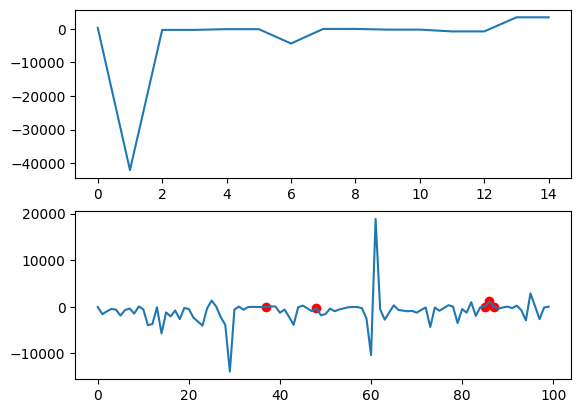

********-~  [DAY -  5 ] ~-********
day1 :  26.52753072172933
day2 :  39.58283176130831
day3 :  44.39694727025196
day4 :  55.55380971312161
day5 :  63.193032312640355
day6 :  1463.8632602539158
day7 :  1452.3769294118922
day8 :  1427.2773828304091
day9 :  1423.0922854815187
0.0
^^^^ Shrinking ^^^^
[ 0.99726132  0.82099331  0.82099331  0.10442721  0.10442721  0.49287269
  0.49287269  0.46678204  0.46678204 -0.48474886 -0.48474886 -0.90746459
 -0.90746459 -0.54231944 -0.54231944]
Top 5 indices : [85 78 87 86 37]


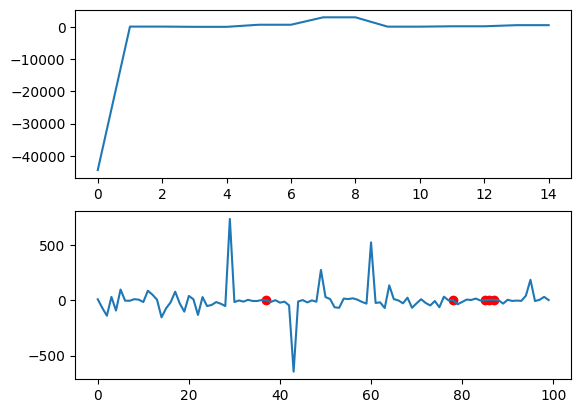

********-~  [DAY -  8 ] ~-********
day1 :  40.06800602946845
day2 :  55.36334673972443
day3 :  59.91397945802787
day4 :  64.96242493185595
day5 :  77.20867596283229
day6 :  102.30384565952733
day7 :  123.02488964940203
day8 :  148.84774178167203
day9 :  1586.4293609926622
0.0
^^^^ Shrinking ^^^^
[ 0.75205702  0.75205702  1.00965345  0.84917183  0.69797119  0.48125353
  0.48125353 -0.72634556 -0.72634556 -0.93517867 -0.77327426 -0.51031849
 -0.51031849 -0.08329524 -0.08329524]
Top 5 indices : [78 85 87 86 37]


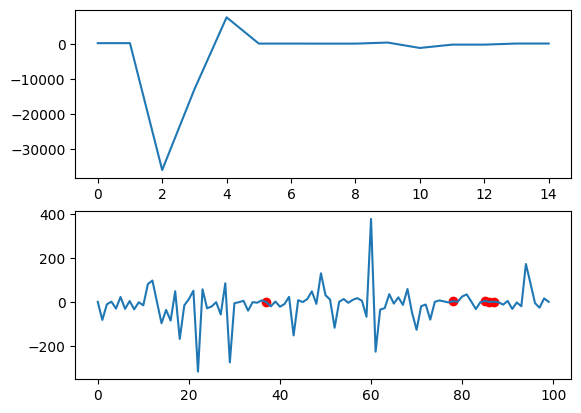

********-~  [DAY -  11 ] ~-********
day1 :  36.535652583553535
day2 :  48.816521035688936
day3 :  72.58061953335091
day4 :  91.676183721378
day5 :  83.75974598925299
day6 :  81.00960860333377
day7 :  88.68690111628639
day8 :  87.96891997350077
day9 :  100.75884588840016
0.0
^^^^ Shrinking ^^^^
[ 0.99785929  0.89787918  0.86149228  0.71289711  0.71289711  0.39495313
  0.39495313  0.03263362  0.03263362 -0.5524509  -0.5524509  -0.66540917
 -0.66540917 -0.91167779 -0.91167779]
Top 5 indices : [85 87 86 37 48]


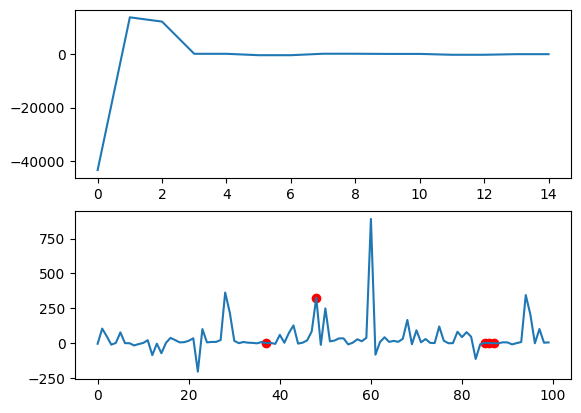

********-~  [DAY -  14 ] ~-********
day1 :  31.68010692836452
day2 :  51.19611177372515
day3 :  71.9617577408016
day4 :  71.85833128802186
day5 :  79.32185402182049
day6 :  85.91376637792563
day7 :  111.23127842478023
day8 :  146.93174447226852
day9 :  188.53266054224943
0.5024566869123838
^^^^ Shrinking ^^^^
[-0.86628989 -0.86628989 -0.65097418 -0.65097418 -0.29848849 -0.29848849
  1.05300457  0.96798711  0.76537156  0.76537156  0.23315353  0.23315353
  0.52453256  0.52453256 -0.02570433]
Top 5 indices : [14 22 95 29 60]


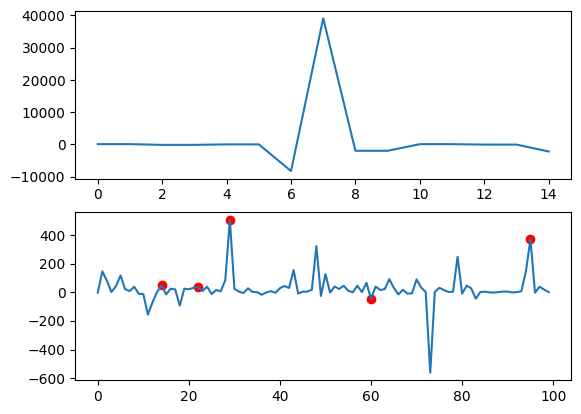

********-~  [DAY -  17 ] ~-********
day1 :  33.448747718858264
day2 :  50.04295891205522
day3 :  79.2150802030154
day4 :  101.91163616855057
day5 :  123.93116484511016
day6 :  149.8939364085951
day7 :  188.07373547701326
day8 :  210.71711574530647
day9 :  258.941817595339
0.0
^^^^ Shrinking ^^^^
[ 0.9939873   0.9939873   0.75938206  0.75938206  0.42308069  0.42308069
  0.34774797  0.04083724  0.04083724 -0.91285187 -0.91285187 -0.42414294
 -0.42414294 -0.54448854 -0.54448854]
Top 5 indices : [78 87 86 48 37]


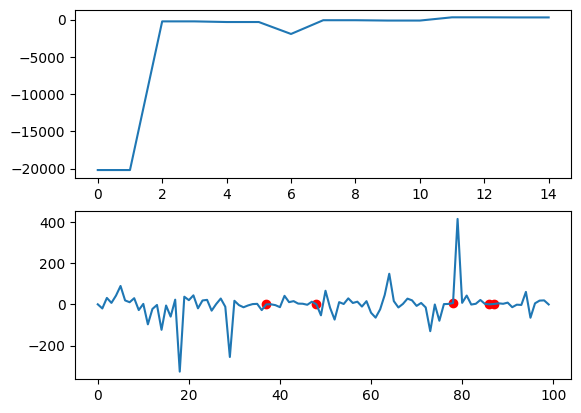

********-~  [DAY -  20 ] ~-********
day1 :  34.807216493437764
day2 :  66.30682888481655
day3 :  96.39544099072776
day4 :  110.91387073144965
day5 :  116.60419267152508
day6 :  148.99006942891958
day7 :  190.1387476869938
day8 :  223.95542028980736
day9 :  230.238725312959
0.0
^^^^ Shrinking ^^^^
[-0.94391018 -0.80271679 -0.80271679 -0.54455923 -0.54455923  0.98862224
  0.8156758   0.8156758   0.77093372  0.77093372  0.42580286  0.26220242
  0.26220242 -0.05690315 -0.05690315]
Top 5 indices : [78 87 86 48 37]


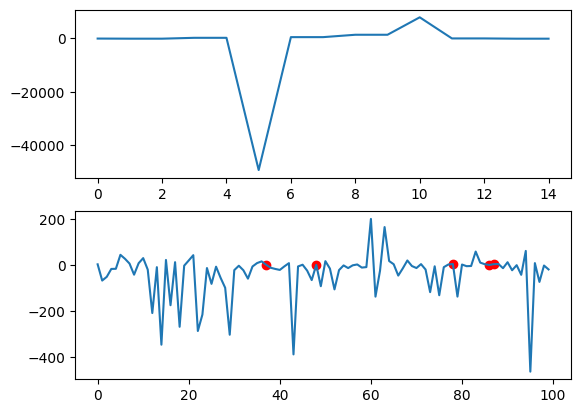

********-~  [DAY -  23 ] ~-********
day1 :  92.65136468973493
day2 :  127.06388515137677
day3 :  160.9850881937075
day4 :  154.96473693698957
day5 :  184.92600241796157
day6 :  298.48774611324495
day7 :  459.6038546361939
day8 :  533.1324047135781
day9 :  613.9860833615925
0.07248916010713713
^^^^ Shrinking ^^^^
[ 0.31172458  0.31172458  0.49106129  0.49106129  1.01249177  1.01249177
  0.74765748  0.74765748 -0.18378272 -0.18378272 -0.67073029 -0.67073029
 -0.9120213  -0.9120213  -0.26848028]
Top 5 indices : [48 37 98 68 11]


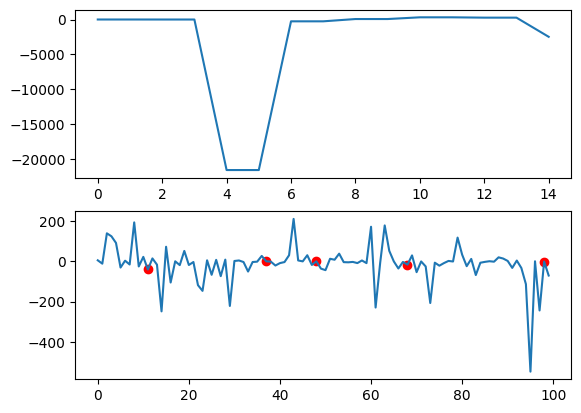

********-~  [DAY -  26 ] ~-********
day1 :  32.080493273851395
day2 :  50.96024805440219
day3 :  64.4716324377288
day4 :  65.36520308097113
day5 :  59.68267764065412
day6 :  73.69666726696994
day7 :  85.60265808894168
day8 :  81.9374116030609
day9 :  89.40895803664236
0.5361934293083379
^^^^ GrowinG ^^^^
[-0.94126585 -0.89986644 -0.89986644 -0.5952177  -0.5952177  -0.24873515
 -0.24873515  1.0024723   0.81132351  0.83744061  0.83744061  0.61351423
  0.61351423  0.27117779  0.27117779]
Top 5 indices : [14 22 95 29 60]


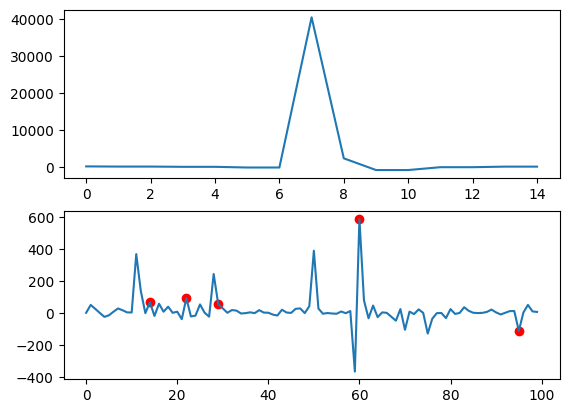

********-~  [DAY -  29 ] ~-********
day1 :  45.01267728552421
day2 :  85.60582793204394
day3 :  125.33492377240609
day4 :  184.68526742546112
day5 :  217.0927565026694
day6 :  277.3083720245651
day7 :  348.11869380806866
day8 :  369.6935952538641
day9 :  429.2609078208526
0.5200147284660588
^^^^ Shrinking ^^^^
[ 1.0471697   0.9681179   0.86961911  0.86961911  0.52945072  0.52945072
  0.34551293 -0.02398871 -0.02398871 -0.48639988 -0.48639988 -0.85629001
 -0.85629001 -0.77259287 -0.77259287]
Top 5 indices : [22 14 95 29 60]


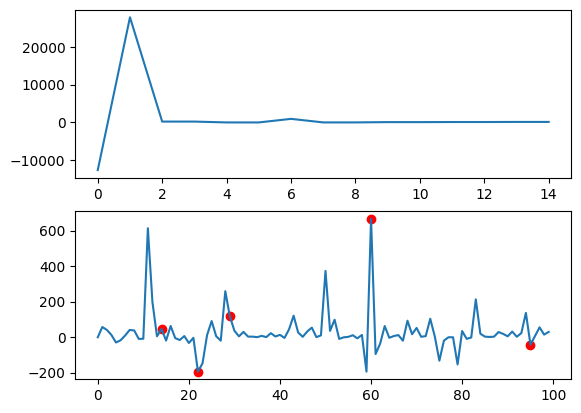

********-~  [DAY -  32 ] ~-********
day1 :  48.212523014914225
day2 :  45.553926461131375
day3 :  70.48165436001428
day4 :  63.32591394615303
day5 :  60.79508070034374
day6 :  65.29396024266879
day7 :  61.12698414452744
day8 :  72.03616657176191
day9 :  102.61962879937873
0.0
^^^^ Shrinking ^^^^
[-1.06175636 -1.06175636 -0.78899403 -0.78899403  1.00427395  0.79515501
  0.79515501  0.76659468  0.5603863   0.40146719  0.40146719 -0.118427
 -0.118427   -0.1276368  -0.1276368 ]
Top 5 indices : [78 87 86 37 48]


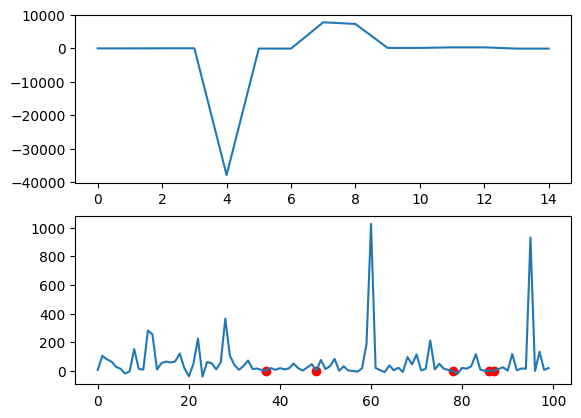

********-~  [DAY -  35 ] ~-********
day1 :  47.423599377306566
day2 :  58.701201971537266
day3 :  91.01225748914086
day4 :  86.3258392016066
day5 :  106.76268899378333
day6 :  144.47096600061832
day7 :  211.19056593740046
day8 :  168.61819973390118
day9 :  166.34033746153102
0.0
^^^^ Shrinking ^^^^
[ 0.99801163  0.89049011  0.89049011  0.35203242  0.35203242  0.6446946
  0.6446946  -1.09072513 -0.13841013 -0.13841013 -0.68357262 -0.68357262
 -0.53789955 -0.2081173  -0.2081173 ]
Top 5 indices : [78 87 86 37 48]


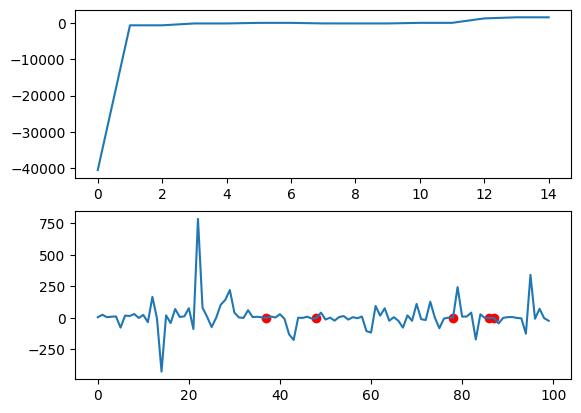

********-~  [DAY -  38 ] ~-********
day1 :  56.55715064205543
day2 :  40.66998299242292
day3 :  55.424993272888116
day4 :  57.89837727392115
day5 :  61.01124087443357
day6 :  79.7275239190493
day7 :  90.42299679343112
day8 :  116.1753279415963
day9 :  141.3040505501952
0.5304101512211669
^^^^ Shrinking ^^^^
[ 0.99820598  0.80982994  0.80982994  0.8042932   0.8042932   0.27770521
  0.27770521 -0.32845065 -0.32845065 -0.04411579 -0.04411579 -0.80227478
 -0.80227478 -0.84828636 -0.55076433]
Top 5 indices : [14 22 95 29 60]


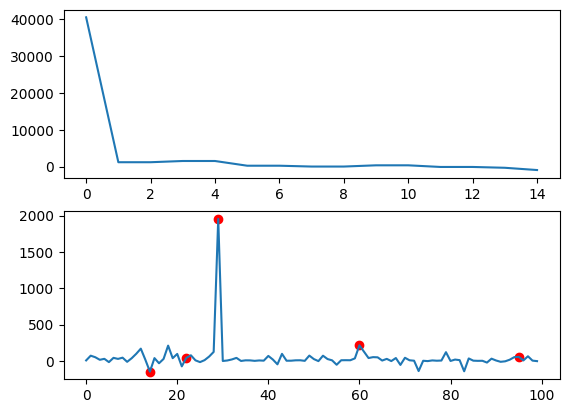

********-~  [DAY -  41 ] ~-********
day1 :  24.83788450718657
day2 :  34.18152504587787
day3 :  37.629126583599316
day4 :  51.87894800343197
day5 :  62.52104481980652
day6 :  71.04211546306345
day7 :  64.31003657049561
day8 :  83.76696713962218
day9 :  86.3218774798206
0.0
^^^^ Shrinking ^^^^
[ 0.99894711  0.83180286  0.83180286  0.59759956  0.59759956  0.26089737
  0.26089737  0.4081011  -0.16974743 -0.16974743 -0.98588372 -0.84729575
 -0.84729575 -0.60608153 -0.60608153]
Top 5 indices : [78 87 86 37 48]


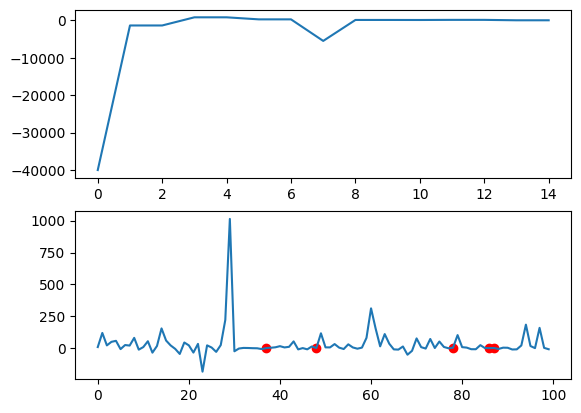

********-~  [DAY -  44 ] ~-********
day1 :  41.12673773406039
day2 :  77.92784441882571
day3 :  86.80841197191607
day4 :  90.7697840661175
day5 :  95.76532986425283
day6 :  116.46582103825011
day7 :  110.96478449724923
day8 :  116.021962081172
day9 :  131.77899217003375
0.0
^^^^ Shrinking ^^^^
[ 1.01416398  0.92316931  0.84260595  0.84260595  0.45705827  0.45705827
 -0.67156363 -0.67156363 -0.73429686 -0.73429686 -0.26054935  0.07978207
  0.07978207 -0.15062433 -0.15062433]
Top 5 indices : [78 87 86 48 37]


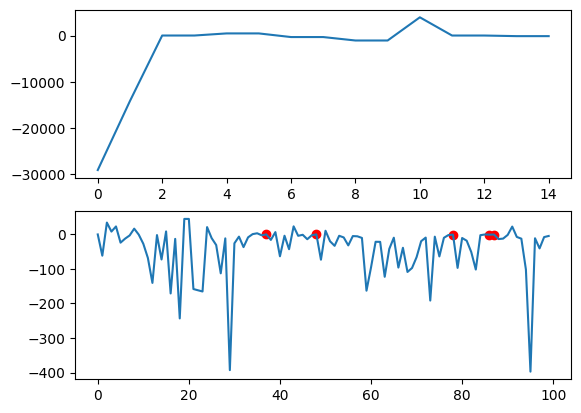

********-~  [DAY -  47 ] ~-********
day1 :  48.79299688985475
day2 :  99.14020120223164
day3 :  121.11740140219086
day4 :  104.22979963996185
day5 :  92.87076533335032
day6 :  80.76178569519693
day7 :  68.82108476375537
day8 :  106.62053832366809
day9 :  135.27676706360765
0.5491468421968909
^^^^ Shrinking ^^^^
[ 9.94685084e-01  9.23113629e-01  9.23113629e-01  6.41033988e-01
  6.41033988e-01  2.11294953e-01  2.11294953e-01  4.34986901e-01
 -5.36791635e-04 -3.39338017e-01 -3.39338017e-01 -7.33337037e-01
 -7.33337037e-01 -9.67478967e-01 -9.67478967e-01]
Top 5 indices : [14 22 95 29 60]


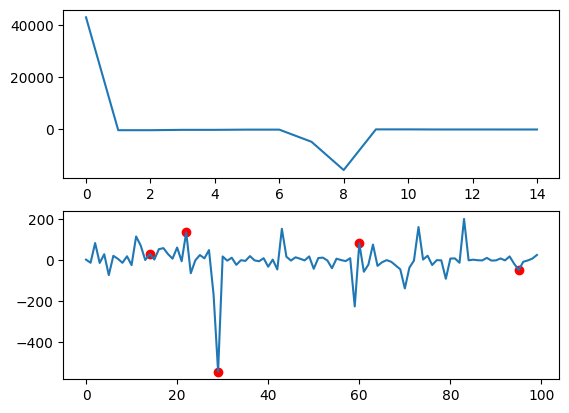

********-~  [DAY -  50 ] ~-********
day1 :  75.05202622929585
day2 :  118.38600210651353
day3 :  133.93248453569694
day4 :  195.70146415885523
day5 :  269.8870069387232
day6 :  303.4954599514971
day7 :  336.4279448888125
day8 :  391.87663267089783
day9 :  449.57566720333625
0.0
^^^^ Shrinking ^^^^
[ 0.98274816  0.98711311  0.98711311  0.52189823  0.52189823  0.35645895
  0.35645895 -0.24820308 -0.24820308 -0.00417784 -0.00417784 -0.64788686
 -0.64788686 -0.91024892 -0.91024892]
Top 5 indices : [78 86 87 48 37]


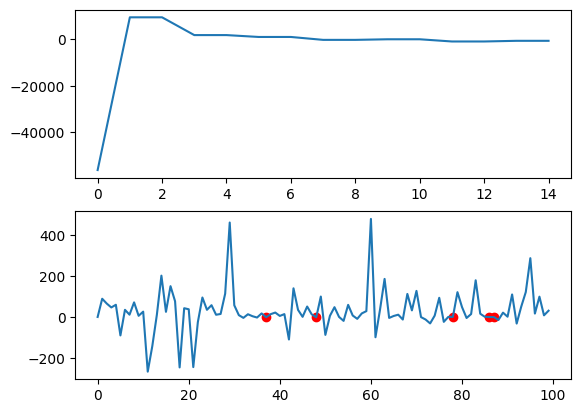

********-~  [DAY -  53 ] ~-********
day1 :  51.30978241390758
day2 :  136.7183957785753
day3 :  141.78309234120928
day4 :  215.6686002922656
day5 :  265.9932883020737
day6 :  274.2061310323628
day7 :  322.08049507093614
day8 :  396.0506719047317
day9 :  413.16647923738327
0.08806152517198618
^^^^ Shrinking ^^^^
[ 0.74309316  0.74309316  0.96555843  0.82119808  0.82119808  0.35187954
  0.35187954 -1.04332714 -0.79163521 -0.79163521 -0.34549474 -0.34549474
 -0.04149056 -0.04149056 -0.30303461]
Top 5 indices : [87 86 37 48 25]


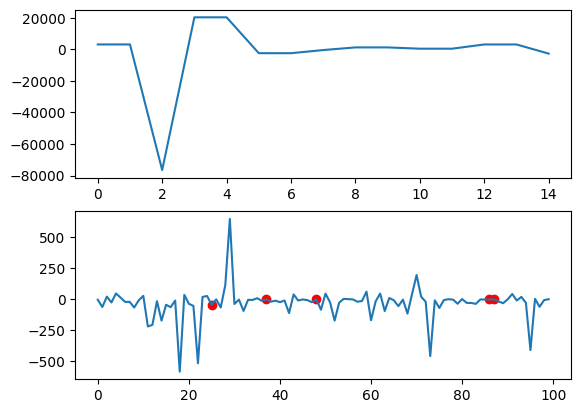

********-~  [DAY -  56 ] ~-********
day1 :  67.14610906044686
day2 :  145.33182266267144
day3 :  223.23901273117147
day4 :  283.2459466243427
day5 :  318.37188960546797
day6 :  341.78593221443583
day7 :  471.97121543153713
day8 :  482.7538526368259
day9 :  601.3523240952004
0.7417563827053705
^^^^ Shrinking ^^^^
[ 0.99122062  1.04521104  0.84751977  0.84751977  0.57513194  0.57513194
 -1.02512378 -0.88210784 -0.88210784 -0.46454244 -0.46454244 -0.04105439
 -0.04105439  0.01036271  0.01036271]
Top 5 indices : [22 95 60 29 25]


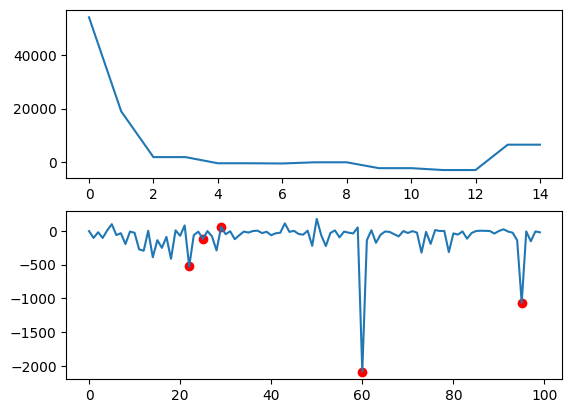

********-~  [DAY -  59 ] ~-********
day1 :  118.49910301240887
day2 :  105.91968972997225
day3 :  87.88482927308756
day4 :  149.01883355471875
day5 :  186.0556532585149
day6 :  263.12334640784206
day7 :  333.4922905862328
day8 :  353.88965107756303
day9 :  425.2484983258174
0.0
^^^^ Shrinking ^^^^
[-1.02011242 -0.89083749 -0.89083749  1.04539596  1.00570514  0.76638877
  0.76638877  0.38459632  0.38459632  0.25049506  0.25049506 -0.05607778
 -0.05607778 -0.51018889 -0.51018889]
Top 5 indices : [90 78 87 86 37]


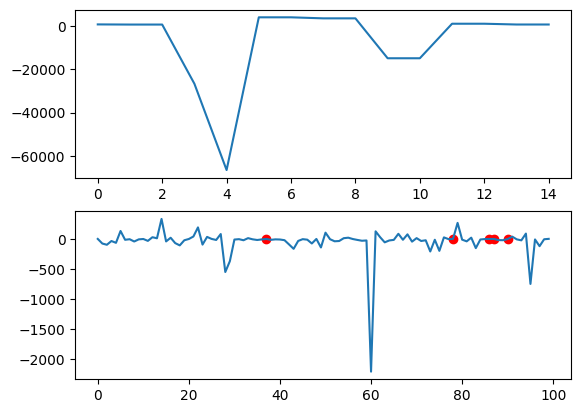

********-~  [DAY -  62 ] ~-********
day1 :  190.07022332991218
day2 :  202.42473429673765
day3 :  216.18608162744212
day4 :  238.85581071553744
day5 :  242.6090426680669
day6 :  237.3807828837791
day7 :  266.7367301579556
day8 :  286.9653415391803
day9 :  298.8821110848389
0.0
^^^^ Shrinking ^^^^
[ 1.00150016  0.96343142  0.96343142  0.70262524  0.70262524  0.36825554
  0.36825554 -0.95549544 -0.95549544 -0.61330816 -0.61330816 -0.15965591
 -0.15965591 -0.33959798 -0.33959798]
Top 5 indices : [85 78 87 86 37]


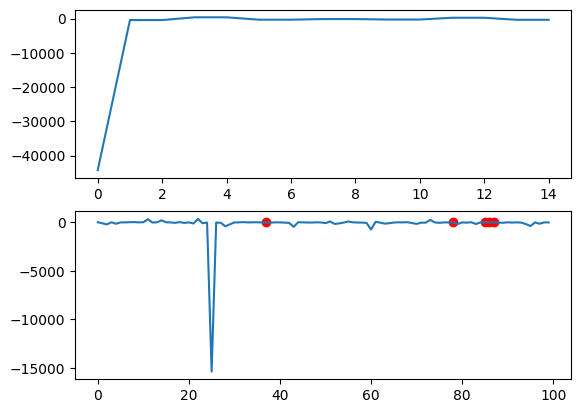

********-~  [DAY -  65 ] ~-********
day1 :  91.84344167437223
day2 :  100.62324956878237
day3 :  127.95568031632047
day4 :  316.7946599072227
day5 :  321.2938639511965
day6 :  312.2309209956256
day7 :  263.80288430930636
day8 :  301.39568234782155
day9 :  393.17293356781846
0.4952343558909144
^^^^ GrowinG ^^^^
[ 0.8209747   0.8209747   1.00517223  0.92019795  0.72165275  0.72165275
  0.16413417  0.16413417 -0.25935056 -0.25935056 -0.56079769 -0.56079769
 -0.95568963 -0.95568963 -0.90475388]
Top 5 indices : [22 95 25 29 60]


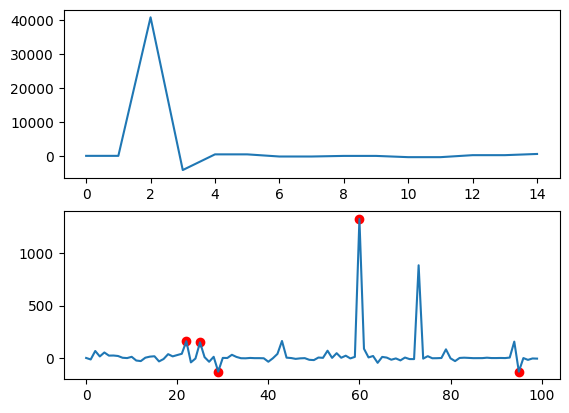

********-~  [DAY -  68 ] ~-********
day1 :  41.008968040885875
day2 :  71.28735677165447
day3 :  124.61486778577765
day4 :  175.87248530591626
day5 :  239.80944956389044
day6 :  313.2177362831591
day7 :  475.29177311597596
day8 :  512.1769448739637
day9 :  532.8812867196114
0.0
^^^^ Shrinking ^^^^
[-0.9310664  -0.81082509 -0.81082509 -0.590842   -0.590842   -0.21964444
 -0.21964444  0.21377418  0.21377418  0.58310457  0.58310457  0.9130405
  0.9130405   0.98339585  0.88747859]
Top 5 indices : [85 78 87 86 37]


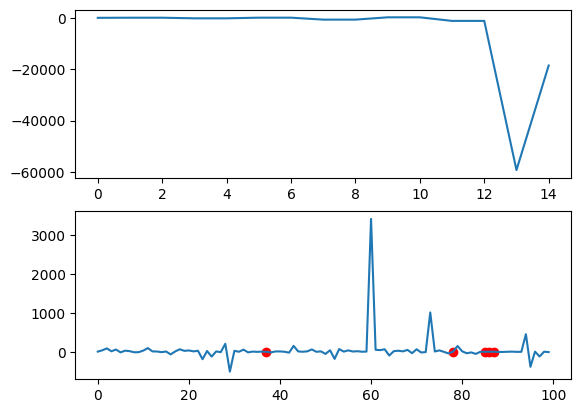

********-~  [DAY -  71 ] ~-********
day1 :  57.63506193589351
day2 :  95.86160791185675
day3 :  126.68766064331177
day4 :  142.9600239564338
day5 :  152.19525717922747
day6 :  152.66877980032993
day7 :  195.07984935727552
day8 :  206.60388938163425
day9 :  214.27593423362657
0.49261239424457826
^^^^ GrowinG ^^^^
[ 1.00047925  1.03518177  1.03518177  0.6582766   0.6582766   0.14122712
  0.14122712  0.21446849  0.21446849 -0.37112524 -0.37112524 -0.82000736
 -0.82000736 -0.81643497 -0.81643497]
Top 5 indices : [22 25 95 29 60]


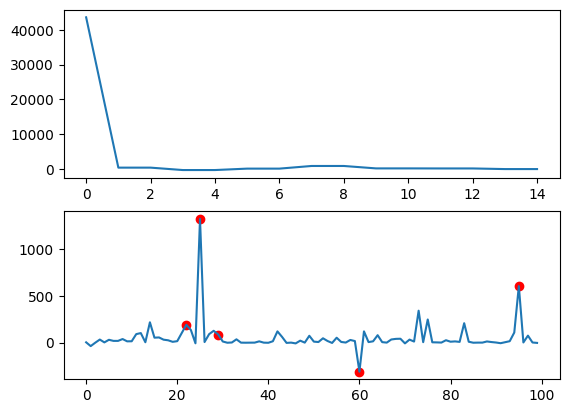

********-~  [DAY -  74 ] ~-********
day1 :  41.73599363047171
day2 :  61.363279062538886
day3 :  83.90116691109232
day4 :  81.92905381488899
day5 :  110.1831168288259
day6 :  119.92703543847125
day7 :  122.11511539199884
day8 :  101.81328047852193
day9 :  141.17860659004168
0.03792553708572258
^^^^ Shrinking ^^^^
[ 1.00763845  1.00763845  0.69118063  0.69118063  0.62863816  0.62863816
 -0.92924129 -0.92924129 -0.826536   -0.50168056 -0.50168056  0.06158163
  0.06158163 -0.09052517 -0.09052517]
Top 5 indices : [78 87 86 37 66]


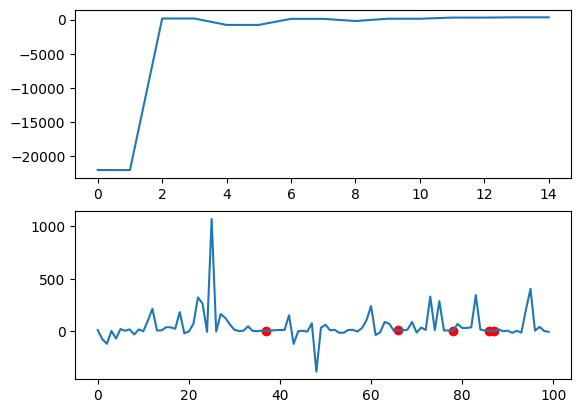

********-~  [DAY -  77 ] ~-********
day1 :  39.5250794290762
day2 :  62.55204093215352
day3 :  83.95658672943135
day4 :  99.57043288850058
day5 :  159.01419912224554
day6 :  191.4474541222752
day7 :  278.2735040317681
day8 :  283.42884421686927
day9 :  292.29748362062253
0.0
^^^^ Shrinking ^^^^
[ 0.99255433  0.95440814  0.95440814  0.75423816  0.75423816  0.37205334
  0.37205334  0.01908067  0.01908067 -0.89877348 -0.89877348 -0.59448883
 -0.59448883 -0.42714939 -0.42714939]
Top 5 indices : [85 78 87 86 37]


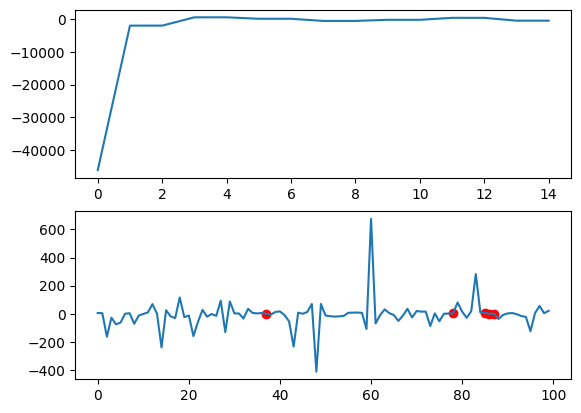

********-~  [DAY -  80 ] ~-********
day1 :  54.962393831003475
day2 :  57.83134940269135
day3 :  70.60238067902577
day4 :  122.46945346528653
day5 :  119.75071743190537
day6 :  126.59109022525693
day7 :  133.47936404305784
day8 :  133.74213667532015
day9 :  152.34034563043875
0.4903571908662627
^^^^ GrowinG ^^^^
[ 1.00605309  0.76921671  0.76921671  0.80575223  0.80575223  0.23262937
  0.23262937  0.15812057  0.15812057 -0.40595472 -0.40595472 -0.68461535
 -0.68461535 -1.0210319  -0.70664226]
Top 5 indices : [22 25 95 29 60]


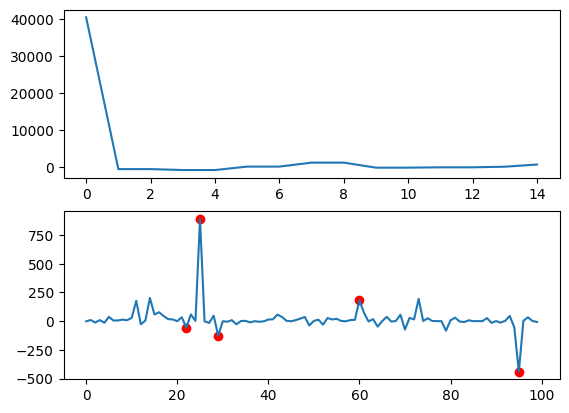

********-~  [DAY -  83 ] ~-********
day1 :  44.96390784781042
day2 :  63.24454556854494
day3 :  69.97276589312467
day4 :  82.20579681326177
day5 :  107.52462748814332
day6 :  152.9320515450405
day7 :  211.79360228885656
day8 :  221.72910708661635
day9 :  239.50926550897367
0.0
^^^^ Shrinking ^^^^
[-0.89265185 -0.74213215 -0.74213215 -0.59938765 -0.59938765 -0.20117497
 -0.20117497  1.00796947  0.94597605  0.94597605  0.84692053  0.5135194
  0.5135194   0.24089013  0.24089013]
Top 5 indices : [78 87 86 66 37]


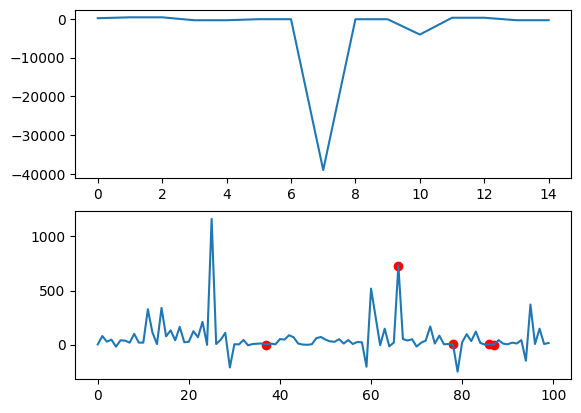

********-~  [DAY -  86 ] ~-********
day1 :  45.04673295976759
day2 :  64.39746686608102
day3 :  72.23865698485005
day4 :  72.74773940589169
day5 :  67.18836352216371
day6 :  84.95720453919442
day7 :  95.52945847987951
day8 :  88.76184018670249
day9 :  79.62064056158343
0.4932640229343344
^^^^ GrowinG ^^^^
[-0.98981564 -0.85929723 -0.85929723 -0.57040077 -0.57040077 -0.03749354
 -0.03749354  0.21651425  0.21651425  0.54367613  0.54367613  1.00409562
  0.87204509  0.87204509  0.79778706]
Top 5 indices : [22 25 95 29 60]


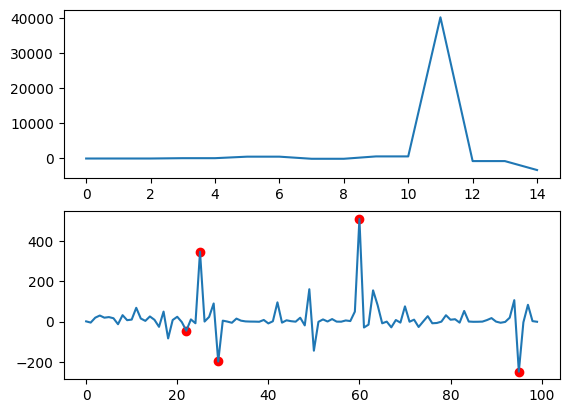

********-~  [DAY -  89 ] ~-********
day1 :  38.58188740588747
day2 :  55.08345171215976
day3 :  82.67853641374593
day4 :  112.08574380363812
day5 :  124.10111123353569
day6 :  132.03761210617978
day7 :  134.2094505796485
day8 :  135.9077008122991
day9 :  115.75764947942127
0.0
^^^^ Shrinking ^^^^
[-0.95272448 -0.86488426 -0.86488426 -0.52178132 -0.52178132 -0.23085703
 -0.23085703  0.94588061  0.94588061  1.00841769  0.87837402  0.60112306
  0.60112306  0.28430788  0.28430788]
Top 5 indices : [78 87 86 66 37]


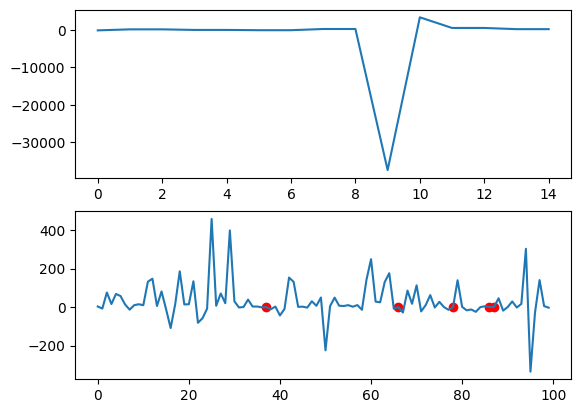

********-~  [DAY -  92 ] ~-********
day1 :  58.84285713813258
day2 :  72.9284505957905
day3 :  72.63512479676838
day4 :  83.60712453794436
day5 :  85.49045847483842
day6 :  95.0756514148018
day7 :  118.60100700724291
day8 :  124.01081158303948
day9 :  129.90226428918916
0.1242792606499422
^^^^ Shrinking ^^^^
[-0.96859643 -0.96859643 -0.32897592 -0.32897592 -0.56096447 -0.56096447
  0.27488467  0.27488467  1.01335427  0.74659542  0.74659542  0.78411795
  0.59001556  0.206896   -0.20078776]
Top 5 indices : [37 66  0 99 25]


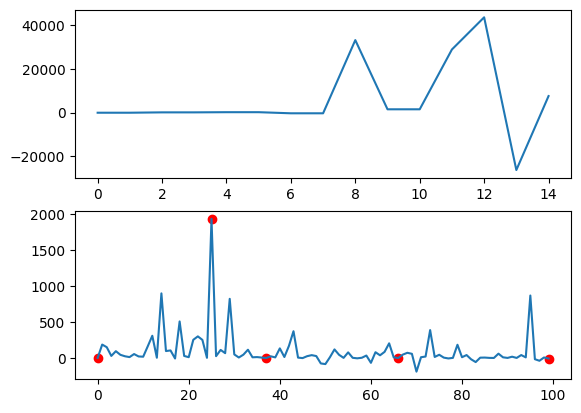

********-~  [DAY -  95 ] ~-********
day1 :  49.49834149543713
day2 :  62.877824475548394
day3 :  61.54858779828624
day4 :  81.55605467272402
day5 :  100.92323188005301
day6 :  109.23244127357611
day7 :  121.21629615811163
day8 :  116.56997057073332
day9 :  115.90143308496533
0.0
^^^^ Shrinking ^^^^
[ 1.00404441  0.86928263  0.86928263  0.63292603  0.50300323  0.50300323
  0.08640553  0.08640553 -0.27072266 -0.27072266 -0.50149759 -0.84793616
 -0.84793616 -0.75819053 -0.75819053]
Top 5 indices : [78 87 86 66 37]


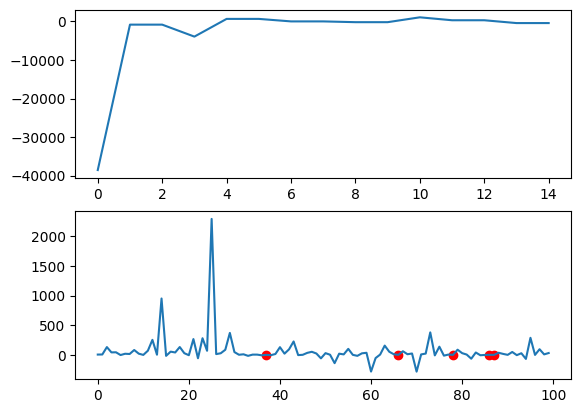

********-~  [DAY -  98 ] ~-********
day1 :  51.42841841774228
day2 :  125.00928790734116
day3 :  186.42996475295993
day4 :  194.13584394284806
day5 :  182.774707455424
day6 :  194.2018786441876
day7 :  208.44750460828465
day8 :  234.48212929823785
day9 :  295.68236609661943
0.0
^^^^ Shrinking ^^^^
[ 0.23322519  0.23322519  0.74536635  0.74536635  0.98976276  0.78503995
  0.71618237  0.71618237 -0.35588236 -0.35588236 -0.92063868 -0.92063868
 -0.54617269 -0.54617269 -0.08687372]
Top 5 indices : [78 87 86 66 37]


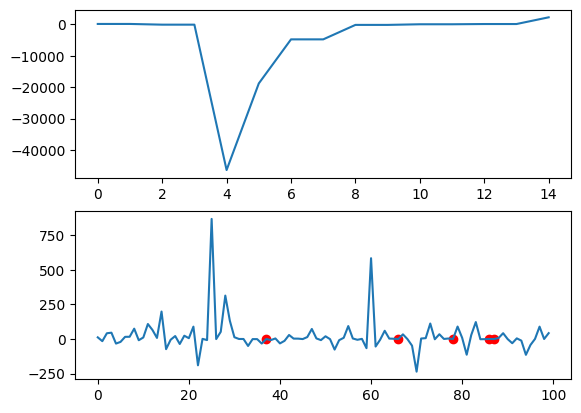

********-~  [DAY -  101 ] ~-********
day1 :  37.8836512019214
day2 :  48.85262194940216
day3 :  56.4822980382165
day4 :  51.5119857125764
day5 :  51.35908546144167
day6 :  49.602618816476514
day7 :  57.78224877261439
day8 :  70.08767163935725
day9 :  87.47758644579095
0.5022624601541609
^^^^ GrowinG ^^^^
[ 1.00475305  0.89946571  0.89946571  0.77246097  0.77246097  0.37679241
  0.37679241 -1.07827267 -0.81677926 -0.81677926 -0.11350628 -0.18296581
 -0.18296581 -0.46277119 -0.46277119]
Top 5 indices : [22 25 95 29 60]


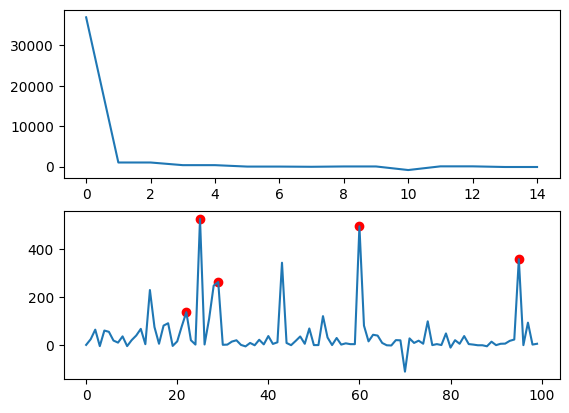

********-~  [DAY -  104 ] ~-********
day1 :  49.20494257916912
day2 :  50.17226378284061
day3 :  81.64876408188998
day4 :  73.22788291771556
day5 :  90.03224786896115
day6 :  103.62837902131514
day7 :  132.69302861223218
day8 :  150.0967367231654
day9 :  165.1359360892264
0.0
^^^^ Shrinking ^^^^
[-0.97954086 -0.93485524 -0.93485524 -0.59631832 -0.59631832 -0.07996331
 -0.07996331  1.01704864  1.04733005  0.46269688  0.46269688  0.72425084
  0.72425084  0.39181458  0.39181458]
Top 5 indices : [78 87 86 66 37]


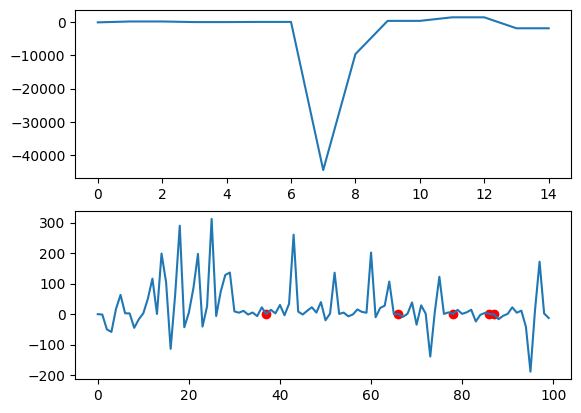

********-~  [DAY -  107 ] ~-********
day1 :  70.06299933353891
day2 :  179.36775004668755
day3 :  294.8478320898058
day4 :  485.10312076856746
day5 :  722.5827909000892
day6 :  1039.763757575016
day7 :  1412.902945261772
day8 :  1909.6313175495786
day9 :  2587.3355120767064
0.5047679963697425
^^^^ Shrinking ^^^^
[ 1.31500232  0.99481066  0.84543497  0.84543497  0.12058202  0.12058202
  0.39973158  0.39973158  0.37646235 -0.4126787  -0.4126787  -0.57436534
 -0.57436534 -0.89050091 -0.89050091]
Top 5 indices : [22 25 95 29 60]


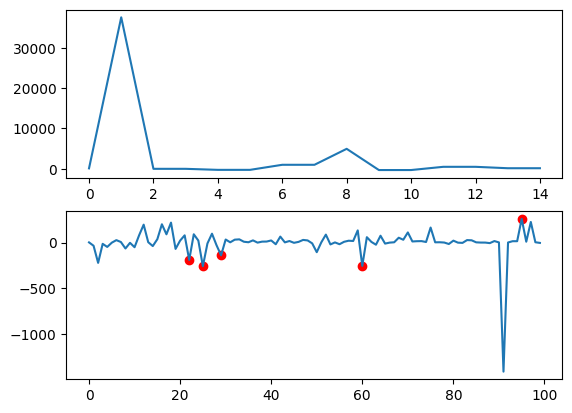

********-~  [DAY -  110 ] ~-********
day1 :  56.2093420475056
day2 :  55.853182665781716
day3 :  83.0183862586447
day4 :  87.76139436371861
day5 :  108.79935230328823
day6 :  137.65697783798865
day7 :  135.55051231094774
day8 :  178.57587432140383
day9 :  190.16918206289043
0.0
^^^^ Shrinking ^^^^
[-1.16854437 -1.16854437  1.03550342  0.98725391  0.77576911  0.77576911
  0.36416341  0.36416341  0.03206644  0.03206644 -0.75023057 -0.75023057
 -0.30683464 -0.30683464  0.37115741]
Top 5 indices : [78 87 86 66 37]


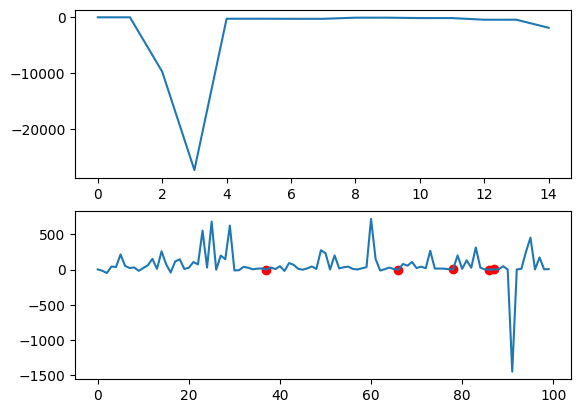

********-~  [DAY -  113 ] ~-********
day1 :  56.46957163667247
day2 :  81.99456422601658
day3 :  61.60516177891698
day4 :  70.88744267818892
day5 :  98.81202955385088
day6 :  96.26191485074652
day7 :  98.75820385217638
day8 :  137.95911133996165
day9 :  173.75075224747104
0.0
^^^^ Shrinking ^^^^
[-0.90382117 -0.90382117 -0.65543711 -0.65543711 -0.16383658 -0.16383658
 -0.36921656  0.28766443  0.28766443  1.03202841  0.96174476  0.80930625
  0.80930625  0.50506966  0.50506966]
Top 5 indices : [78 87 86 66 37]


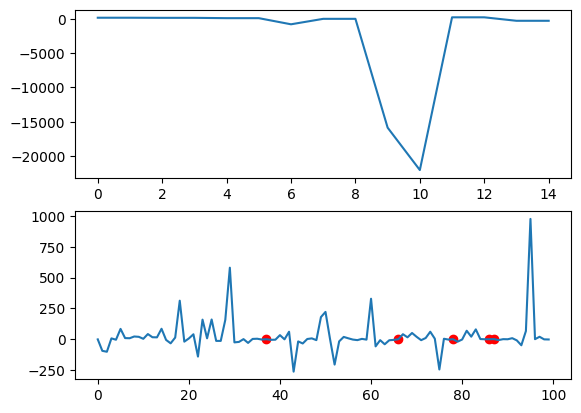

********-~  [DAY -  116 ] ~-********
day1 :  50.11610128634509
day2 :  94.22489071560379
day3 :  153.29126494622605
day4 :  203.94217120030714
day5 :  240.98209625345962
day6 :  279.0340111104943
day7 :  300.68691343298593
day8 :  350.0179168627004
day9 :  389.5079364070448
0.5169404570036132
^^^^ Shrinking ^^^^
[ 1.13598237  0.9842683   0.93904857  0.93904857  0.36467904  0.36467904
  0.44820115 -0.00723319 -0.00723319 -0.49299855 -0.49299855 -0.51457453
 -0.51457453 -0.93141992 -0.93141992]
Top 5 indices : [22 25 95 29 60]


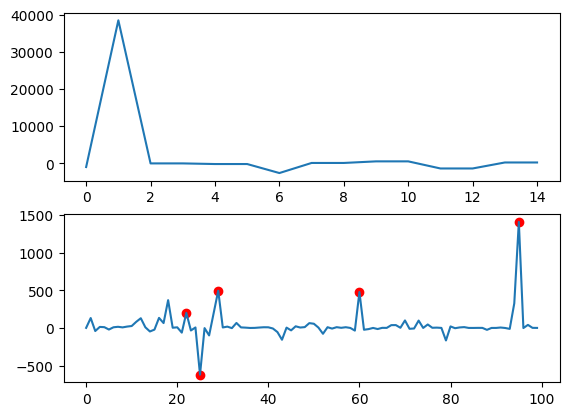

********-~  [DAY -  119 ] ~-********
day1 :  36.95424623274104
day2 :  79.33395658185971
day3 :  92.44174122083594
day4 :  104.66980984860898
day5 :  109.28692620057731
day6 :  125.26285502747041
day7 :  159.82870958404143
day8 :  182.53749291058455
day9 :  165.25439220190881
0.5247683566311651
^^^^ GrowinG ^^^^
[ 1.00200493  0.96525459  0.96525459  0.66109813  0.66109813  0.29383606
  0.29383606 -0.11495717 -0.11495717 -1.08904062 -0.68182623 -0.68182623
 -0.62098139 -0.62098139  0.11282571]
Top 5 indices : [22 25 95 29 60]


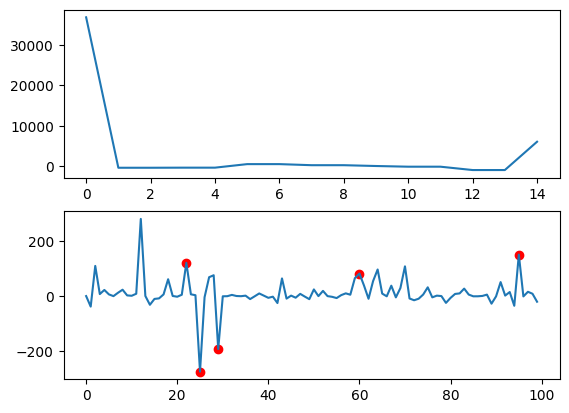

********-~  [DAY -  122 ] ~-********
day1 :  37.9517229220686
day2 :  73.46607401481168
day3 :  65.53390972416686
day4 :  46.5557400495178
day5 :  57.48614541386136
day6 :  60.18397918229806
day7 :  66.69878229005808
day8 :  71.26011351420672
day9 :  75.72109022074093
0.5282364670123744
^^^^ Shrinking ^^^^
[ 0.99837488  0.8293395   0.8293395   0.46976569  0.46976569  0.39659822
  0.39659822  0.04139572  0.04139572 -0.87167889 -0.87167889 -0.64470394
 -0.64470394 -0.37603731 -0.37603731]
Top 5 indices : [22 25 95 29 60]


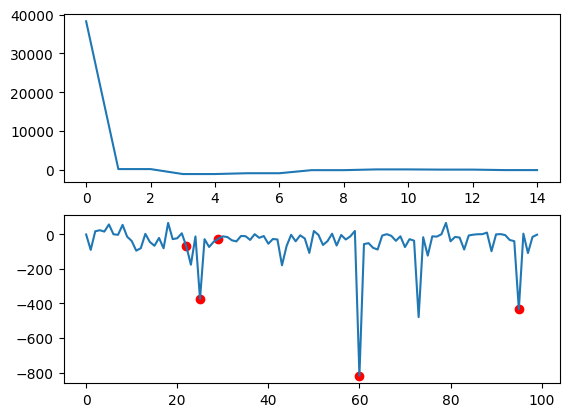

********-~  [DAY -  125 ] ~-********
day1 :  38.33932634339805
day2 :  54.30092243120716
day3 :  52.298202784113755
day4 :  74.8429297518267
day5 :  124.7567021125813
day6 :  132.1954026963433
day7 :  115.10715549337041
day8 :  135.72114717702732
day9 :  121.76698244637564
0.5358804411593947
^^^^ Shrinking ^^^^
[-0.81404591 -0.74364371 -0.74364371 -0.6294461  -0.6294461   0.99946871
  0.92182035  0.92182035  0.61716787  0.61716787  0.38087693  0.1625965
  0.1625965  -0.06805011 -0.06805011]
Top 5 indices : [22 25 95 29 60]


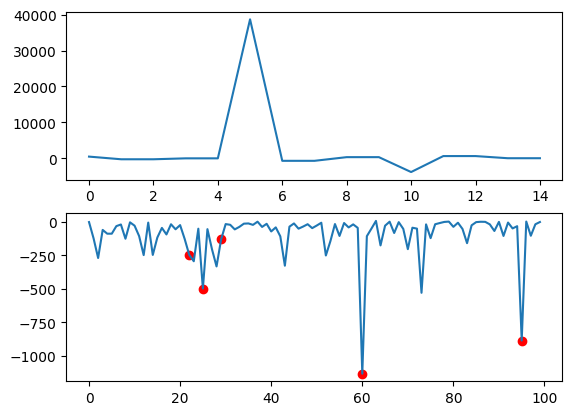

********-~  [DAY -  128 ] ~-********
day1 :  31.98104345223742
day2 :  72.52225553164081
day3 :  76.37337463554464
day4 :  89.82104076758895
day5 :  90.36167502348177
day6 :  87.6966321882611
day7 :  93.16276194106482
day8 :  85.47372957681613
day9 :  86.64816380621141
0.5478765656443338
^^^^ Shrinking ^^^^
[ 0.99766176  0.91582923  0.91582923  0.75937869  0.75937869 -0.86785315
 -0.86785315 -0.66347607 -0.66347607 -0.38192481 -0.38192481  0.03347488
  0.03347488  0.31434084  0.31434084]
Top 5 indices : [22 25 95 29 60]


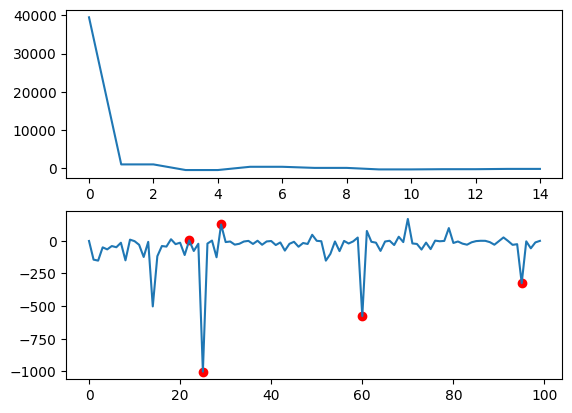

********-~  [DAY -  131 ] ~-********
day1 :  57.467984784361626
day2 :  125.18317265976214
day3 :  75.25151965589508
day4 :  75.36977249720071
day5 :  110.12295334293236
day6 :  101.00096748184707
day7 :  102.17469184619041
day8 :  124.57026401507433
day9 :  126.76555497734137
0.5615681711345406
^^^^ Shrinking ^^^^
[ 0.99472835  0.89515485  0.89515485  0.62805399  0.62805399  0.52800717
  0.52800717 -0.03544055 -0.03544055 -0.54674127 -0.54674127 -0.86788597
 -0.86788597 -0.69772178 -0.69772178]
Top 5 indices : [22 25 95 29 60]


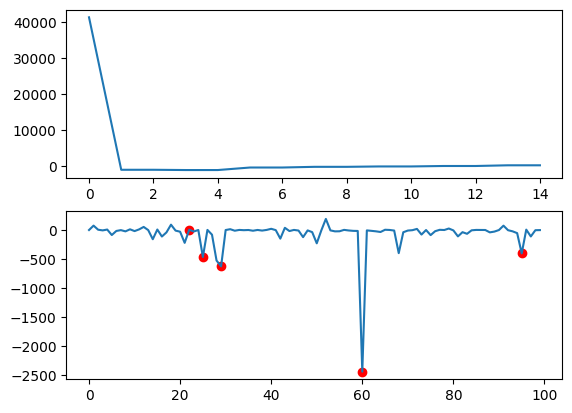

********-~  [DAY -  134 ] ~-********
day1 :  50.52675587819098
day2 :  88.08075583867009
day3 :  150.88411411687227
day4 :  210.15626065475914
day5 :  203.12497505125302
day6 :  238.40573219381508
day7 :  317.18692415526067
day8 :  334.25502551783256
day9 :  304.8192304077929
0.0
^^^^ Shrinking ^^^^
[ 1.01202572  0.79377788  0.79377788  0.70111392  0.70111392  0.07652558
  0.07652558  0.25723128  0.25723128 -0.46841689 -0.46841689 -0.53800071
 -0.53800071 -0.86049514 -0.86049514]
Top 5 indices : [78 87 86 37 66]


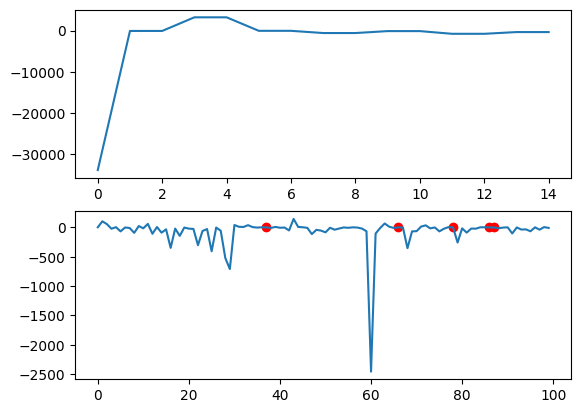

********-~  [DAY -  137 ] ~-********
day1 :  54.50975610081208
day2 :  108.57813764071464
day3 :  227.12754298073793
day4 :  242.5284748295115
day5 :  226.91932100603256
day6 :  287.48088615049807
day7 :  290.1053614812528
day8 :  264.47334960589814
day9 :  223.6349678173115
0.0
^^^^ Shrinking ^^^^
[ 0.99361847  0.97263811  0.97263811  0.4225763   0.4225763   0.58062395
  0.58062395 -0.17648247 -0.17648247 -0.73340826 -0.73340826 -0.70052896
 -0.70052896 -0.20534593 -0.20534593]
Top 5 indices : [66 78 87 86 37]


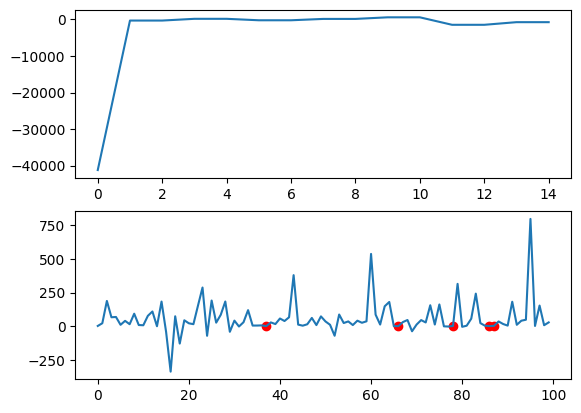

********-~  [DAY -  140 ] ~-********
day1 :  82.30397124872806
day2 :  132.05747461983637
day3 :  231.24121980410482
day4 :  253.2706949775635
day5 :  274.39785103064025
day6 :  335.01337355469246
day7 :  458.0802486332309
day8 :  601.8573527281186
day9 :  699.0066328136099
0.6058290097981313
^^^^ Shrinking ^^^^
[ 1.10055457  0.96834954  0.81486878  0.81486878  0.52218238  0.52218238
  0.19177681  0.19177681 -0.38319088 -0.38319088 -1.095588   -0.69728395
 -0.69728395 -0.64939904 -0.64939904]
Top 5 indices : [22 95 25 29 60]


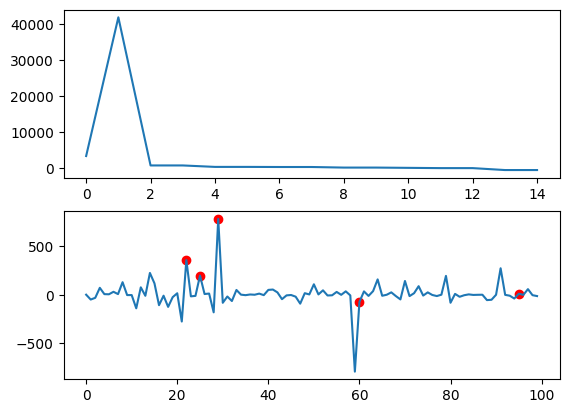

********-~  [DAY -  143 ] ~-********
day1 :  94.17146944186007
day2 :  229.94576984573337
day3 :  270.5727154981234
day4 :  371.2618814382659
day5 :  486.4415337023066
day6 :  596.6440502393426
day7 :  696.0385598217866
day8 :  802.8460333085102
day9 :  899.5770738529374
0.5718194583243912
^^^^ GrowinG ^^^^
[ 1.04266173  0.8349651   0.8349651   0.63520548  0.63520548 -0.83819941
 -0.83819941 -0.40025021 -0.40025021 -0.43782111 -0.43782111  0.32424222
  0.32424222  0.01426495  0.01426495]
Top 5 indices : [22 25 95 29 60]


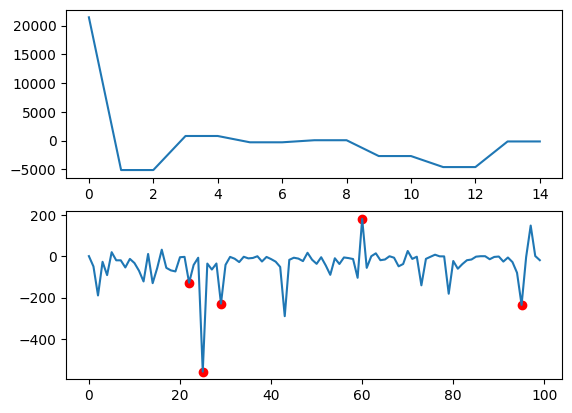

********-~  [DAY -  146 ] ~-********
day1 :  44.280418345487796
day2 :  60.744487817306336
day3 :  83.22287888931787
day4 :  124.57694742494459
day5 :  87.6174989816698
day6 :  168.68908495000375
day7 :  157.44662589623687
day8 :  200.43847173407187
day9 :  156.99563525914172
0.5884038448212114
^^^^ Shrinking ^^^^
[ 0.9902646   0.80538625  0.80538625  0.71832347  0.71832347  0.38381456
  0.38381456 -1.07655732 -0.72619306 -0.72619306 -0.54002964 -0.54002964
 -0.03525997 -0.03525997 -0.11055654]
Top 5 indices : [22 25 95 29 60]


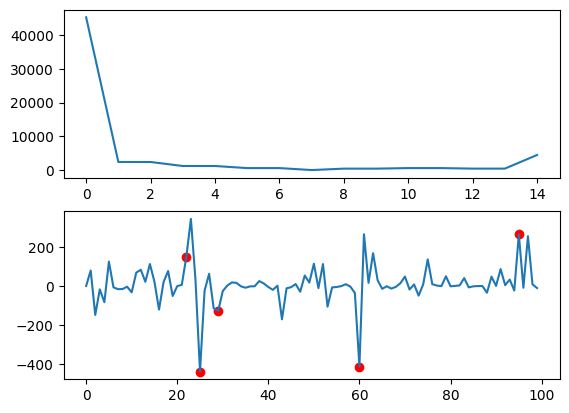

********-~  [DAY -  149 ] ~-********
day1 :  79.33046521790232
day2 :  139.56984711570126
day3 :  127.45071061125398
day4 :  149.21615148733403
day5 :  131.70674998020445
day6 :  160.6545446637767
day7 :  155.81561911968447
day8 :  140.60706323157035
day9 :  185.28100757016705
0.5910251693806016
^^^^ Shrinking ^^^^
[ 0.98682032  0.89506585  0.89506585  0.76250371  0.76250371  0.41136439
  0.41136439 -0.02717607 -0.02717607 -0.56069466 -0.56069466 -0.96582878
 -0.96582878 -0.55025983 -0.55025983]
Top 5 indices : [22 95 25 29 60]


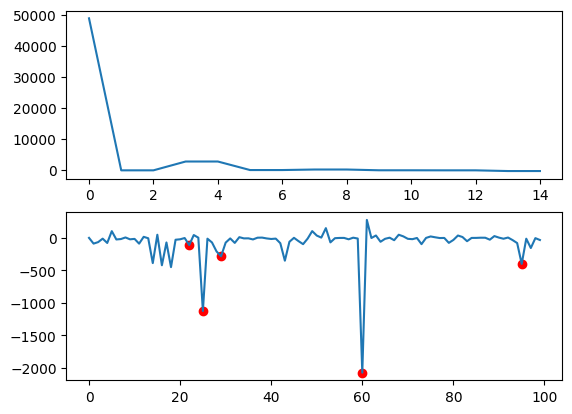

In [51]:
j=33
df = []
i=12 # VARIABLE 3

def dmd_pred(j,i=16) :
    # creating the matrix mat
    # i days are trained j th day from last
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()

    #setting the test set
    # The test set is created by selecting specific columns (day0 to day9) from matx.
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    # dmd
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    # extending the time by adding 9 units
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
    dmd.reconstructed_data.shape


    # prediction
    #extracting the predicted values for each day from the dmd.reconstructed_data
    pred = dmd.reconstructed_data
    pday1 = np.real(pred[:,-9])
    pday2 = np.real(pred[:,-8])
    pday3 = np.real(pred[:,-7])
    pday4 = np.real(pred[:,-6])
    pday5 = np.real(pred[:,-5])
    pday6 = np.real(pred[:,-4])
    pday7 = np.real(pred[:,-3])
    pday8 = np.real(pred[:,-2])
    pday9 = np.real(pred[:,-1])

    # error
    print("day1 : ",mean_absolute_error(day1,pday1))
    print("day2 : ",mean_absolute_error(day2,pday2))
    print("day3 : ",mean_absolute_error(day3,pday3))
    print("day4 : ",mean_absolute_error(day4,pday4))
    print("day5 : ",mean_absolute_error(day5,pday5))
    print("day6 : ",mean_absolute_error(day6,pday6))
    print("day7 : ",mean_absolute_error(day7,pday7))
    print("day8 : ",mean_absolute_error(day8,pday8))
    print("day9 : ",mean_absolute_error(day9,pday9))

    #d_ind is assigned the index of the mode with the maximum amplitude
    d_ind = np.argmax(np.abs(dmd.amplitudes.real))
    #This line prints the maximum value of the real part of the specified mode (d_ind).
    print(np.amax(dmd.modes[:,d_ind].real))

    #if any(np.abs(dmd.eigs.real)>1) and dmd.amplitudes.real[d_ind] > 0 :
    if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        print("^^^^ GrowinG ^^^^")
        fig, axs = plt.subplots(2, 1)
        #The plot shows the real part of the amplitudes obtained from the DMD
        axs[0].plot(dmd.amplitudes.real)

        dmd_pred_plot(dmd, day2-day0, d_ind)
        plt.show()

    else:
        print("^^^^ Shrinking ^^^^")
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(dmd.amplitudes.real)
        dmd_pred_plot(dmd, day5-day0, d_ind)
        plt.show()
for k in range(2,150,3) :
    print("********-~  [DAY - ",k,"] ~-********")
    dmd_pred(k)

# **ver3**

In [ ]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE500i.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [ ]:
matx.shape

(461, 1461)

In [53]:
sym = pd.read_csv("DATA/nse50_sym.csv",header=None) #VARIABLE 2
sym

,0
0,ADANIENT.NS
1,ADANIPORTS.NS
2,APOLLOHOSP.NS
3,ASIANPAINT.NS
4,AXISBANK.NS
5,BAJAJ-AUTO.NS
6,BAJFINANCE.NS
7,BAJAJFINSV.NS
8,BHARTIARTL.NS
9,BPCL.NS


In [58]:
j=191
df = []
i=6 # VARIABLE 3

mat = matx.iloc[:, -(i+j):-j]
day2 = matx.iloc[:, -(i+j)+1]
mat=mat.to_numpy()

In [59]:
day0 = matx.iloc[:, -j-1]
day1 = matx.iloc[:, -j]
day2 = matx.iloc[:, -j+1]
day3 = matx.iloc[:, -j+2]
day4 = matx.iloc[:, -j+3]
day5 = matx.iloc[:, -j+4]
day6 = matx.iloc[:, -j+5]
day7 = matx.iloc[:, -j+6]
day8 = matx.iloc[:, -j+7]
day9 = matx.iloc[:, -j+8]

In [60]:
dmd = pydmd.DMD(svd_rank=mat.shape[1])
dmd.fit(mat)
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
dmd.reconstructed_data.shape

(100, 15)

In [61]:
pred = dmd.reconstructed_data
pday1 = np.real(pred[:,-9])
pday2 = np.real(pred[:,-8])
pday3 = np.real(pred[:,-7])
pday4 = np.real(pred[:,-6])
pday5 = np.real(pred[:,-5])
pday6 = np.real(pred[:,-4])
pday7 = np.real(pred[:,-3])
pday8 = np.real(pred[:,-2])
pday9 = np.real(pred[:,-1])

In [62]:
print("day1 : ",mean_absolute_error(day1,pday1))
print("day2 : ",mean_absolute_error(day2,pday2))
print("day3 : ",mean_absolute_error(day3,pday3))
print("day4 : ",mean_absolute_error(day4,pday4))
print("day5 : ",mean_absolute_error(day5,pday5))
print("day6 : ",mean_absolute_error(day6,pday6))
print("day7 : ",mean_absolute_error(day7,pday7))
print("day8 : ",mean_absolute_error(day8,pday8))
print("day9 : ",mean_absolute_error(day9,pday9))

day1 :  64.940211628117
day2 :  70.96556573669855
day3 :  67.62622367138155
day4 :  98.32219824080892
day5 :  110.13134388142336
day6 :  131.58492726341788
day7 :  141.24597646692393
day8 :  200.21731561679513
day9 :  256.9602381026858


In [63]:
print("day1 : ",day1[1]," - pred :",pday1[1])
print("day2 : ",day2[1]," - pred :",pday2[1])
print("day3 : ",day3[1]," - pred :",pday3[1])
print("day4 : ",day4[1]," - pred :",pday4[1])
print("day5 : ",day5[1]," - pred :",pday5[1])

day1 :  2239.55  - pred : 2306.071989179016
day2 :  2235.5  - pred : 2273.6046421282954
day3 :  2354.1  - pred : 2253.4839855954483
day4 :  2392.25  - pred : 2232.8442508316234
day5 :  2399.15  - pred : 2227.593753191859


In [66]:
eig=dmd.eigs
eig

array([ 0.99214039+0.j        ,  0.5411237 +0.49871626j,
        0.5411237 -0.49871626j, -0.66531414+0.51602311j,
       -0.66531414-0.51602311j])

In [65]:
dmd.amplitudes.real

array([42674.45013926,   822.45373388,   822.45373388,  -365.77663331,
        -365.77663331])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


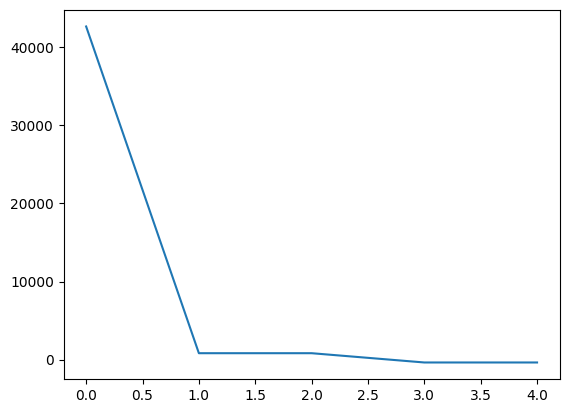

In [67]:
plt.plot(dmd.amplitudes)

In [68]:

np.max(dmd.amplitudes.real)

42674.45013926056

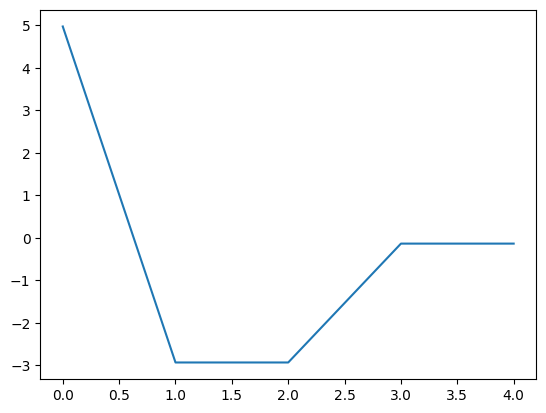

In [69]:
plt.plot(np.sum(dmd.modes.real,axis=0))

In [70]:
d_ind = np.argmax(np.abs(dmd.amplitudes.real))

if np.amax(np.abs(dmd.amplitudes.real)) == np.abs(np.min(dmd.amplitudes.real))  :
    print("Not growing")

d_ind

0

In [71]:
dmd.eigs.real[d_ind]

0.9921403939823421

<StemContainer object of 3 artists>

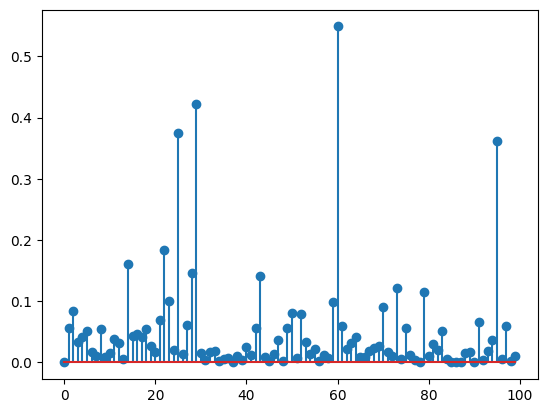

In [72]:
plt.stem(dmd.modes[:,d_ind].real)

In [73]:
days = [day1 , day2 , day3 , day4 , day5 , day6 , day7 , day8 , day9]

[22 95 25 29 60]


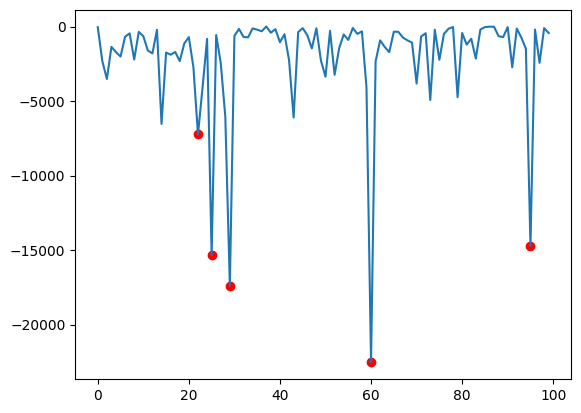

In [75]:
dmode = dmd.modes[:,d_ind].real
diff=i-day0
plt.plot(diff)


# Find the indices of the top 5 elements
top_5_indices = np.argsort(dmode.real)[-5:]
print(top_5_indices)

# Mark the indices on the plot
plt.scatter(top_5_indices,diff[top_5_indices], color='red')

plt.show()

In [76]:
np.argsort(dmd.modes[:,d_ind].real)[-5:]

array([22, 95, 25, 29, 60])

In [77]:
d_ind

0

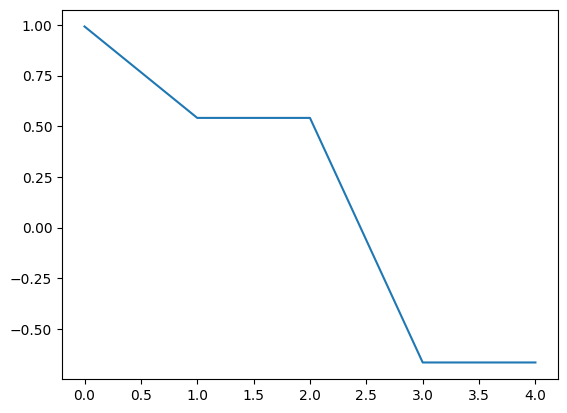

In [78]:

plt.plot(dmd.growth_rate)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


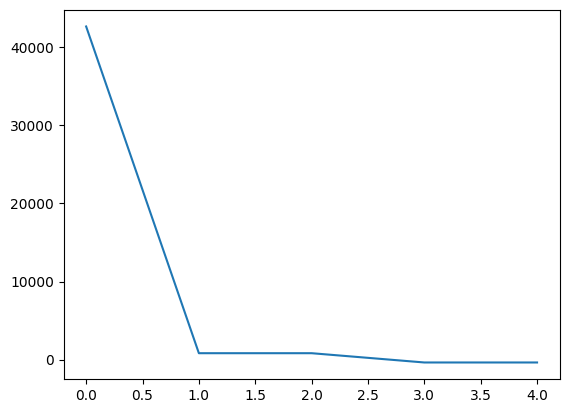

In [79]:
plt.plot(dmd.amplitudes)

In [80]:
np.argsort(dmd.amplitudes.real)

array([4, 3, 2, 1, 0])

Eigenvalue (0.9921403939823421+0j): distance from unit circle 0.007859606017657894
Eigenvalue (0.541123701837108+0.4987162640852812j): distance from unit circle 0.2641108964299883
Eigenvalue (0.541123701837108-0.4987162640852812j): distance from unit circle 0.2641108964299883
Eigenvalue (-0.6653141445456162+0.5160231133373354j): distance from unit circle 0.1580244870361006
Eigenvalue (-0.6653141445456162-0.5160231133373354j): distance from unit circle 0.1580244870361006


/usr/local/lib/python3.10/dist-packages/pydmd/plotter.py:191: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(


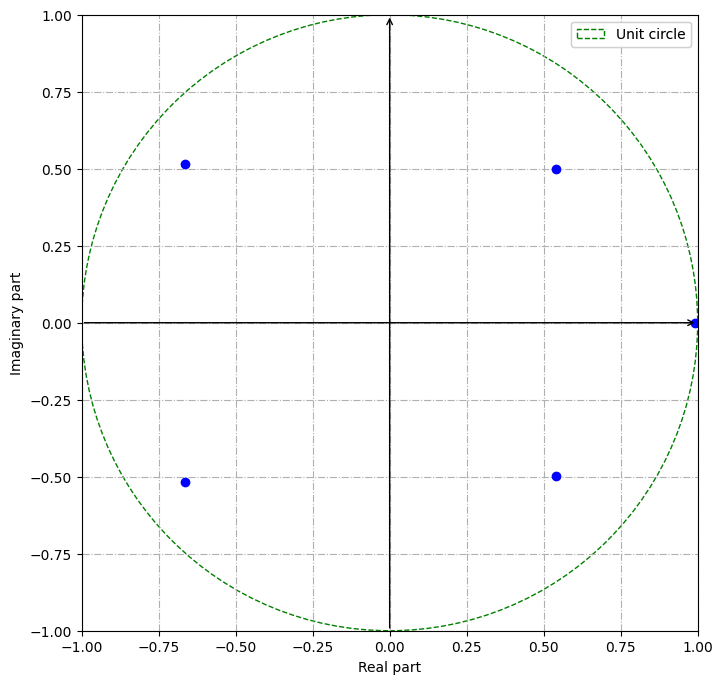

In [82]:
for eig in dmd.eigs:
    print(
        "Eigenvalue {}: distance from unit circle {}".format(
            eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)
        )
    )

plot_eigs(dmd, show_axes=True, show_unit_circle=True)


# **ver5**

In [83]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

sym = pd.read_csv("DATA/nse100_SYM.csv",header=None)

In [84]:
def dmd_pred_plot(dmd,diff,d_ind,top) :
    dmode = dmd.modes[:,d_ind].real
    # Find the indices of the top 5 elements
    top_indices = np.argsort(dmode.real)[-top:]
    print("Recommended stocks are : ")
    for i in top_indices:
        print(sym[0][i],"[",i,"]")

    # Mark the indices on the plot
    plt.plot(diff)
    plt.scatter(top_indices,diff[top_indices], color='red')
    plt.title(" PERFORMACE COMPARISON - RECOMENDED STOCK")
    plt.show()

In [85]:
def dmd_analysis(result_comparison,j,top=3,i=12) :
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()

    # dmd
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9

    # creating the matrix mat
    # i days are trained for j th day from last

    #setting the test set
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()
    day = np.array([day0,day1,day2,day3,day4,day5,day6,day7,day8,day9])
    day_r = day[result_comparison]

    d_ind = np.argmax(np.abs(dmd.amplitudes.real))

    #if any(np.abs(dmd.eigs.real)>1) and dmd.amplitudes.real[d_ind] > 0 :
    if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        print("^^^^ GrowinG ^^^^")
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(dmd.amplitudes.real)
        dmd_pred_plot(dmd, day_r-day0, d_ind, top)
        plt.show()

    else:
        print("^^^^ Shrinking ^^^^")
        print("No growing eigen value found")
        plt.plot(dmd.amplitudes.real)
        plt.show()
        if dmd.amplitudes.real[d_ind] > 0 :
            print("Amplitude is positive")
        plt.title('Amplitudes')

        dmd_pred_plot(dmd, day_r-day0, d_ind, top)

In [86]:
def dmd_pred(j,i,stock_name) :
    # creating the matrix mat
    # i days are trained j th day from last
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()
    # index where the stock is equal to the symbol
    stock_ind = sym[sym[0] == stock_name].index[0]
    #setting the test set
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    # dmd
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
    dmd.reconstructed_data.shape

 # prediction

    pred = dmd.reconstructed_data
    pday1 = np.real(pred[:,-9])
    pday2 = np.real(pred[:,-8])
    pday3 = np.real(pred[:,-7])
    pday4 = np.real(pred[:,-6])
    pday5 = np.real(pred[:,-5])
    pday6 = np.real(pred[:,-4])
    pday7 = np.real(pred[:,-3])
    pday8 = np.real(pred[:,-2])
    pday9 = np.real(pred[:,-1])



    # error
    print("Day1 |","Prediction :",pday1[stock_ind],"| Error :" ,np.abs(day1[stock_ind]-pday1[stock_ind]),"|")
    print("Day2 |","Prediction :",pday2[stock_ind],"| Error :" ,np.abs(day2[stock_ind]-pday2[stock_ind]),"|")
    print("Day3 |","Prediction :",pday3[stock_ind],"| Error :" ,np.abs(day3[stock_ind]-pday3[stock_ind]),"|")
    print("Day4 |","Prediction :",pday4[stock_ind],"| Error :" ,np.abs(day4[stock_ind]-pday4[stock_ind]),"|")
    print("Day5 |","Prediction :",pday5[stock_ind],"| Error :" ,np.abs(day5[stock_ind]-pday5[stock_ind]),"|")
    print("Day6 |","Prediction :",pday6[stock_ind],"| Error :" ,np.abs(day6[stock_ind]-pday6[stock_ind]),"|")
    print("Day7 |","Prediction :",pday7[stock_ind],"| Error :" ,np.abs(day7[stock_ind]-pday7[stock_ind]),"|")
    print("Day8 |","Prediction :",pday8[stock_ind],"| Error :" ,np.abs(day8[stock_ind]-pday7[stock_ind]),"|")
    print("Day9 |","Prediction :",pday9[stock_ind],"| Error :" ,np.abs(day9[stock_ind]-pday7[stock_ind]),"|")

^^^^ Shrinking ^^^^
No growing eigen value found


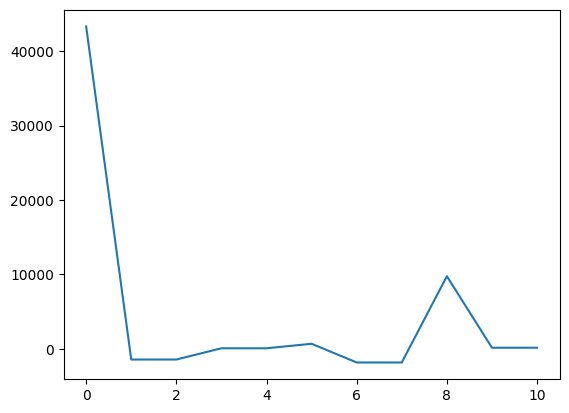

Amplitude is positive
Recommended stocks are : 
BAJFINANCE [ 14 ]
MARUTI [ 22 ]
BOSCHLTD [ 95 ]
NESTLEIND [ 29 ]
SHREECEM [ 60 ]


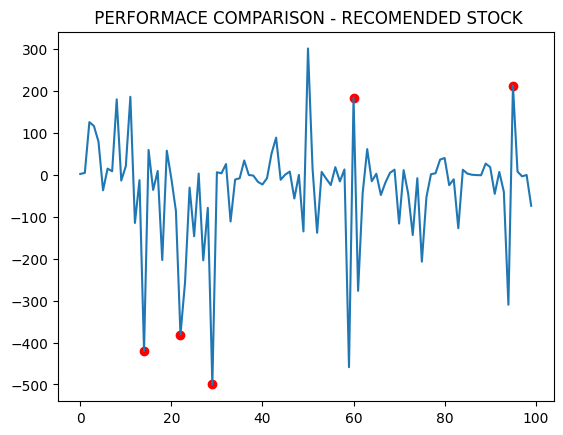

In [87]:

j=25 # date from last                  VARIABLE 2
top=5 # no of stock to recommend       VARIABLE 3
i=12 # training days                   VARIABLE 4

# This variable is to compare the performance of the recomended stock
result_comparison = 9#                 VARIABLE 5
dmd_analysis(result_comparison,j,top,i) # analysis

In [ ]:
sym

,0
0,KARURVYSYA
1,RELIANCE
2,TCS
3,HDFCBANK
4,INFY
...,...
95,BOSCHLTD
96,INDUSTOWER
97,PIIND
98,FACT


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [88]:
stock = 'HDFCBANK' # VARIABLE 6

dmd_pred(25,12,stock)

Day1 | Prediction : 1490.6431068263266 | Error : 18.156893173673325 |
Day2 | Prediction : 1479.078515271457 | Error : 29.271484728542873 |
Day3 | Prediction : 1476.4993363465114 | Error : 48.25066365348857 |
Day4 | Prediction : 1470.1966797999048 | Error : 140.95332020009528 |
Day5 | Prediction : 1455.0762661462359 | Error : 159.9737338537641 |
Day6 | Prediction : 1450.787360484848 | Error : 168.21263951515198 |
Day7 | Prediction : 1452.4344393562508 | Error : 180.4655606437493 |
Day8 | Prediction : 1442.4430435233903 | Error : 165.7155606437493 |
Day9 | Prediction : 1431.8532971660256 | Error : 161.4655606437493 |


# ***Version1 ***

In [89]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE500i.csv",header=None)
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [90]:
import warnings
main_df = pd.DataFrame()
for j in range(10,375,5) :
    df = []
    for i in range(3,25,1) :

        # Get the last 20 columns of the DataFrame
        mat = matx.iloc[:, -(i+j):-j]

        # Create a DMD object and fit it to the data
        mat = mat.astype(float)
        cp = mat.iloc[:, -1]

        mat=mat.to_numpy()
        dmd = pydmd.DMD()

        dmd.fit(mat)


        pred = dmd.predict(mat)
        p=pred[:,-1]
        df.append(mean_absolute_error(cp,np.real(p)))
    main_df = pd.concat([main_df, pd.Series(df)], axis=1,)

In [91]:
name = str(datetime.now().strftime("%Y%m%d%H%M%S"))
main_df.to_csv(name+"ver1.csv", index=False)

Eigenvalue (-0.11754829213752191+0j): distance from unit circle 0.8824517078624781
Eigenvalue (0.3033268067649434+0.6006005036250781j): distance from unit circle 0.3271492612347707
Eigenvalue (0.3033268067649434-0.6006005036250781j): distance from unit circle 0.3271492612347707
Eigenvalue (1.0016412764183997+0j): distance from unit circle 0.0016412764183997286
Eigenvalue (0.899524241883469+0.19094816402204703j): distance from unit circle 0.08043213242337555
Eigenvalue (0.899524241883469-0.19094816402204703j): distance from unit circle 0.08043213242337555
Eigenvalue (0.6826615879757368+0j): distance from unit circle 0.31733841202426316
Eigenvalue (0.7192662263764307+0.32806504551575877j): distance from unit circle 0.20944919297046594
Eigenvalue (0.7192662263764307-0.32806504551575877j): distance from unit circle 0.20944919297046594


/usr/local/lib/python3.10/dist-packages/pydmd/plotter.py:191: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(


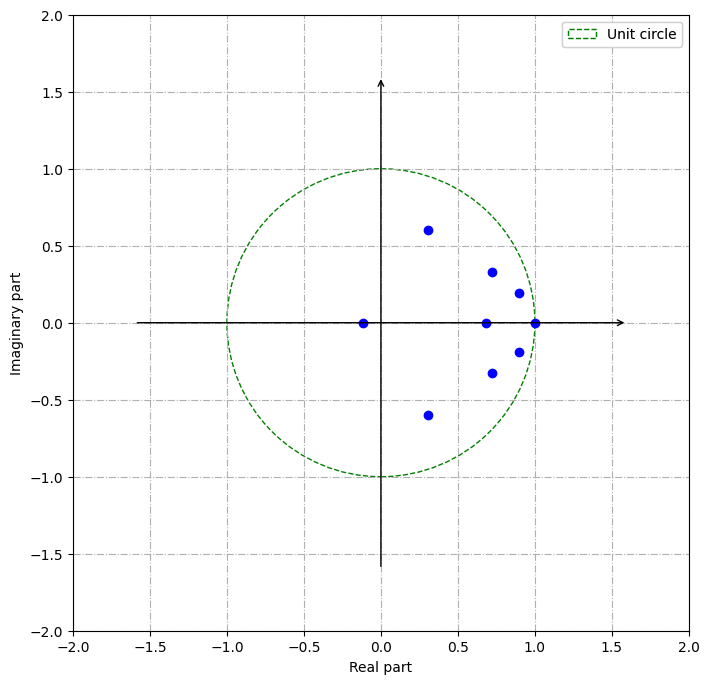

In [92]:
for eig in dmd.eigs:
    print(
        "Eigenvalue {}: distance from unit circle {}".format(
            eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)
        )
    )

plot_eigs(dmd, show_axes=True, show_unit_circle=True)

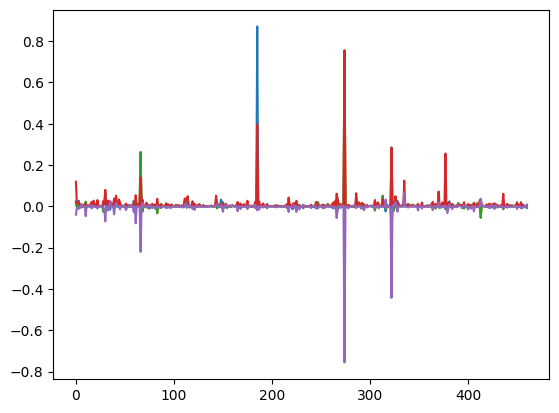

In [93]:
# plot First Five Modes
plt.plot(np.real(dmd.modes[:, :5]))